## Performance of CITE-seq antibodies

- In this notebook density plots and boxplots are generated based on CLR or DSB normalized ADT counts to compare these two alternative normalization methods.
- Signal of classical NK cell markers is compared between NK and B cells to see, whether cell types are separable based on surface protein expression

Samples:

- AML
- EG

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scanpy as sc
import umap
from pySankey import sankey

import warnings

warnings.filterwarnings('ignore')

/research/users/tiinajt/miniconda3/envs/tiina-env2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=120, dpi_save=300, vector_friendly=True)

In [3]:
pwd

'/research/groups/sysgen/PROJECTS/scHEMAP/tiina_work'

In [4]:
#object containnong aplastic anemia samples

adata= sc.read_h5ad('/research/groups/sysgen/PROJECTS/scHEMAP/tiina_work/Easigenomics_subset_final.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 58674 × 32738
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'SAMPLE_CODE', 'SUBTYPE', 'SAMPLE_TYPE', 'BATCH', 'DIAGNOSIS', 'TRAINING', 'HELDOUT_TEST', 'data_name', 'CD19.1', 'CD10', 'CD20', 'CD3', 'CD2.1', 'CD11b', 'HLADR', 'CD38.1', 'CD11c', 'CD7.1', 'CD45', 'CD33.1', 'CD81.1', 'CD73', 'CD123', 'CD14.1', 'CD45RA', 'CD45RO', 'CD4.1', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5.1', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44.1', 'CD58.1', 'CD66ace', 'CD13', 'CD34.1', 'leiden_0.5', 'leiden_1'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'BATCH_colors', 'DIAGNOSIS_colors', 'SAMPLE_CODE_colors', 'hvg', 'leiden', 'leiden_0.5_colors', 'leiden_1_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_TotalVI', 'X_pca', 'X_umap', 'clr_protein_expression', 'dsb_protein_expression', 'protein_expression'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
adata_subset = adata[adata.obs['DIAGNOSIS'] == "AML"]

In [7]:
#selecting NK cells

adata_subset_nk = adata_subset[adata_subset.obs['leiden_1'] == "9"]

In [9]:
adata_subset_nk.shape

(347, 32738)

In [8]:
#selecting B cells

adata_subset_b = adata_subset[adata_subset.obs['leiden_1'] == "17"]

In [10]:
adata_subset_b.shape

(513, 32738)

In [15]:
#Normalized counts for NK cells
clr = adata_subset_nk.obsm['clr_protein_expression']
dsb = adata_subset_nk.obsm['dsb_protein_expression']

#Normalized counts for B cells
clr_b = adata_subset_b.obsm['clr_protein_expression']
dsb_b = adata_subset_b.obsm['dsb_protein_expression']

In [37]:
#Correcting columns names in dsb

dsb=dsb.rename(columns={'CD2.1': 'CD2', 'CD38.1': 'CD38', 'CD5.1' : "CD5", 'CD7.1': 'CD7'})
dsb_b=dsb_b.rename(columns={'CD2.1': 'CD2', 'CD38.1': 'CD38', 'CD5.1' : "CD5", 'CD7.1': 'CD7'})

In [38]:
dsb

,CD19.1,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44.1,CD58.1,CD66ace,CD13,CD34.1
EG37_L18_CATCAAGTCTAACGGT-1,0.703749,2.283183,1.052096,0.861192,7.976988,2.187631,1.717329,-0.676187,2.903946,13.856406,...,1.989939,1.048869,1.823803,-0.509705,1.422722,8.122415,1.131465,2.092567,0.940151,0.602237
EG37_L18_CGTAGCGTCTATCGCC-1,0.454341,1.766881,0.865680,0.861192,9.019447,1.469172,1.434446,2.793147,-0.097142,13.956496,...,0.601723,1.264189,0.667862,1.293980,0.853628,11.952201,0.584642,-0.263321,1.338250,1.382732
EG37_L18_GACCAATGTCCTCCAT-1,0.703749,1.486145,0.865680,0.523743,11.517063,2.713515,1.807863,3.706418,7.414013,10.260616,...,-0.270080,0.066420,0.667862,3.558071,0.546192,11.464876,1.131465,1.240950,-0.948950,-0.001454
EG37_L18_GCTGCGAGTGTTCGAT-1,0.192138,1.031407,2.190750,2.308333,7.295041,2.510049,1.434446,0.337239,-0.677743,14.660820,...,0.797835,1.666096,-0.010614,0.838868,-0.490524,10.386090,-0.040549,0.855184,0.940151,1.008764
EG44_L22_AAACCTGAGAAACCTA-1,-0.663129,-0.150439,0.250449,-0.188463,5.634484,9.519337,0.458663,8.876681,7.484786,19.597996,...,0.694628,0.194913,-0.780146,-0.794955,1.862316,9.595976,-0.382702,1.078163,-0.990256,0.557488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EG62_L30_TGGGAAGCAAGACACG-1,0.730091,0.742701,1.264344,1.761667,16.386643,6.610242,0.616064,2.370201,3.900749,19.648186,...,0.009229,-1.036998,-1.239315,0.047406,-0.292561,6.602243,1.510022,-0.066899,-0.549970,0.475017
EG62_L30_TTATGCTCAAGTACCT-1,3.336519,3.274258,2.814296,1.082775,6.774384,6.486979,3.836335,4.686970,6.020192,16.337479,...,1.800676,2.705638,2.282609,2.016646,2.936609,5.834445,3.836967,1.477753,1.598826,3.111088
EG63_L30_CCTCTGAGTAGCTAAA-1,-0.236456,0.981444,-0.586566,-0.092018,15.418980,3.494870,-1.062293,3.093445,0.096536,11.291908,...,1.800676,0.203510,0.498105,1.427271,0.859979,8.075654,-0.469002,1.744063,-0.549970,0.306943
EG63_L30_GCGACCACAGTCCTTC-1,-1.391158,-1.628617,-1.470527,0.714473,10.398304,1.107166,-1.062293,1.250658,-0.928968,14.597007,...,0.009229,1.409547,-0.479610,0.047406,-0.728698,6.767164,1.510022,-1.230085,-0.060628,-0.227703


In [32]:
#NK cell associated markers (not all specific)

nk_markers = ['CD2', 'CD56', 'CD127', 'CD38', 'CD5', 'CD7']

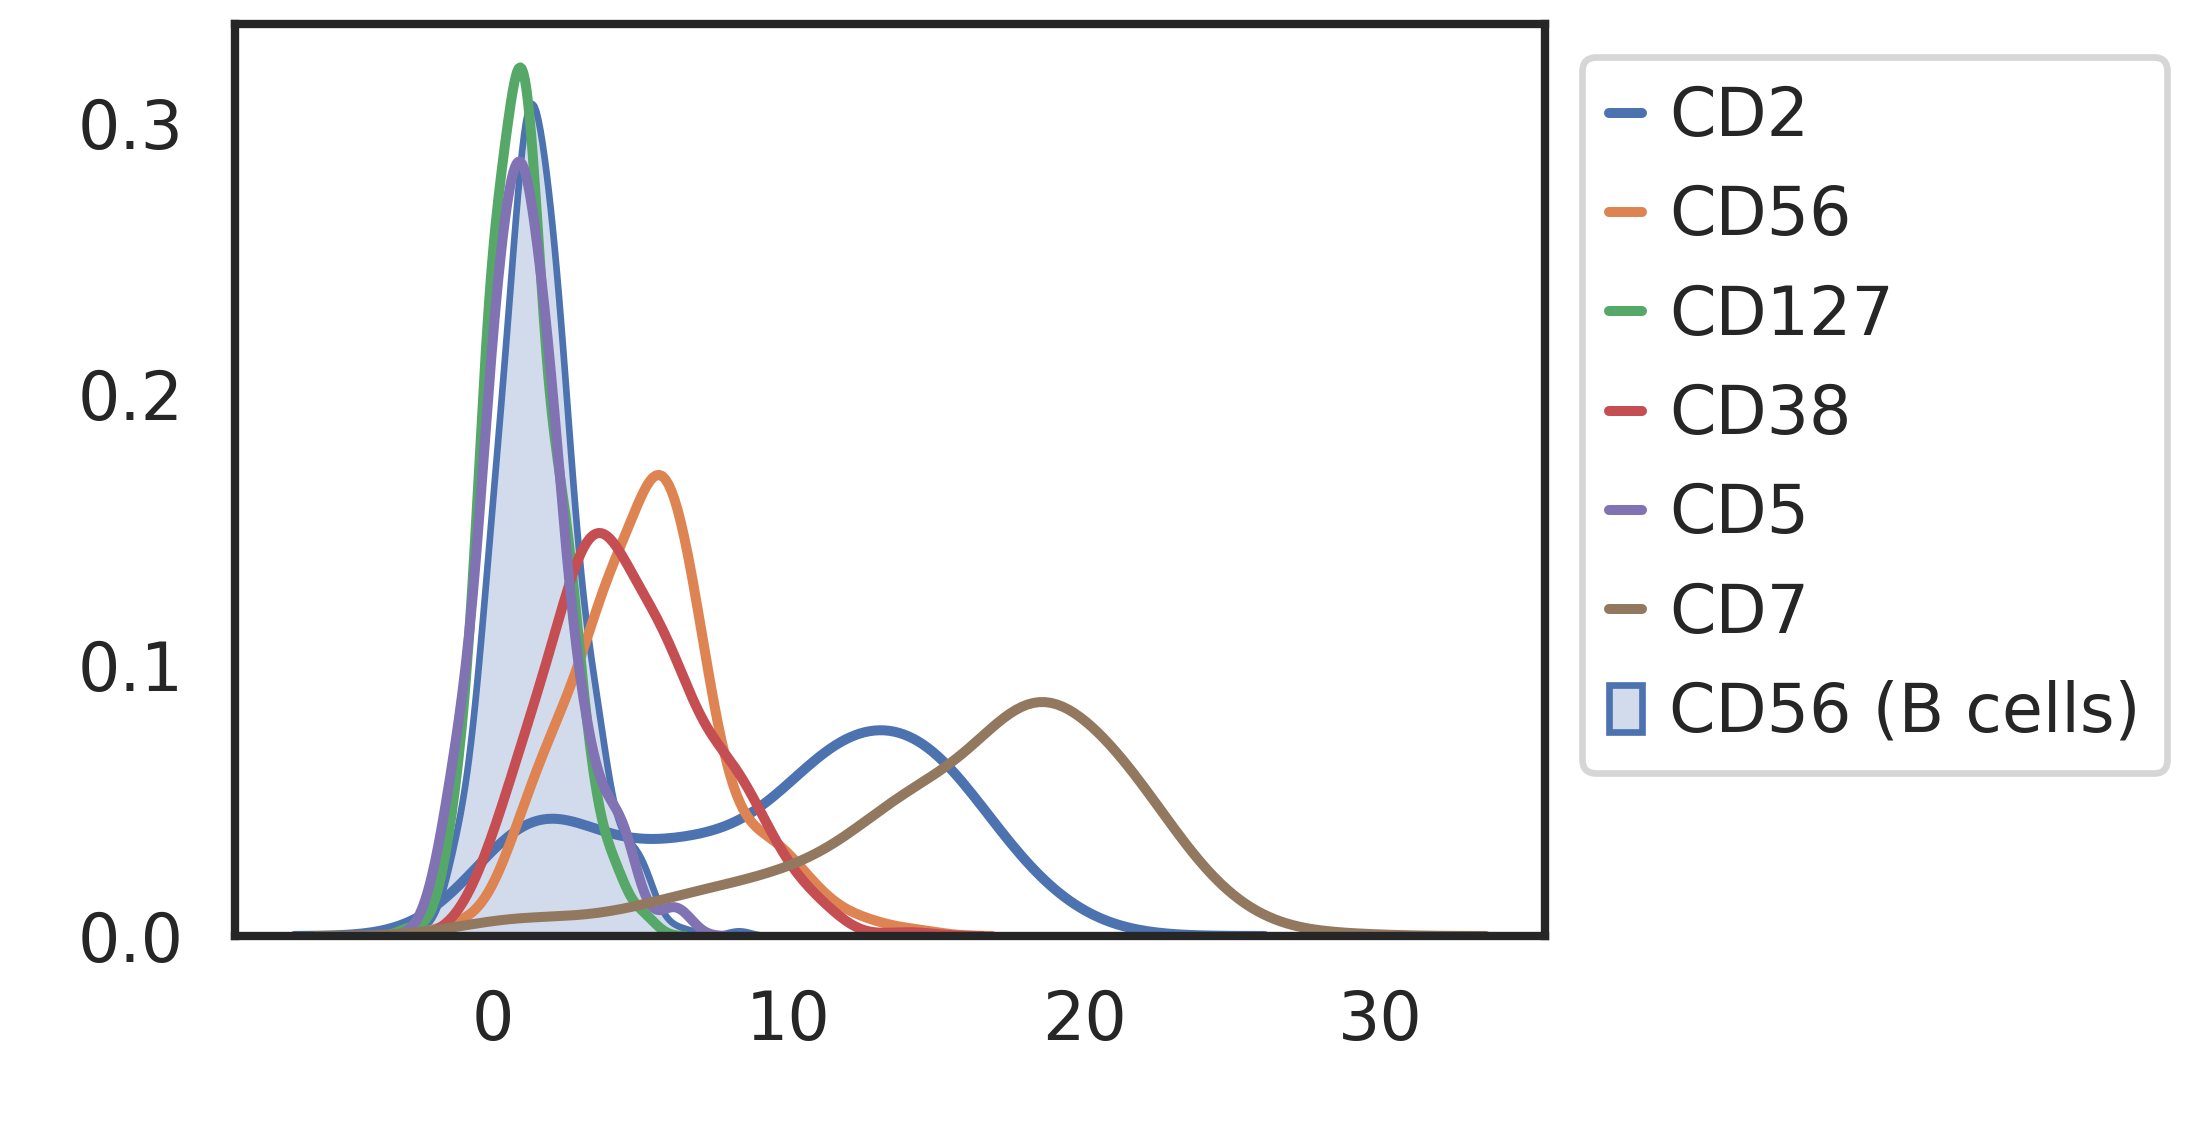

In [65]:
#DSB

sns.set(style='white', font_scale = 0.5, context='poster', rc={'figure.figsize':(7,5)})


markers = nk_markers

for marker in markers:
    a= sns.kdeplot(dsb[marker],
                #fill=True,
                label = marker)
sns.kdeplot(dsb_b["CD56"],
            fill=True,
            label = "CD56 (B cells)")
    
# Plot formatting
plt.legend(prop={'size': 20}, loc='upper right', bbox_to_anchor=(1.5, 1))
#plt.title('Density Plots for selected NK markers, DSB normalized, all aplastic anemia samples')
plt.xlabel(' ')
plt.ylabel(' ')

a.tick_params(axis='y', labelsize=20)
a.tick_params(axis='x', labelsize=20)

plt.show()

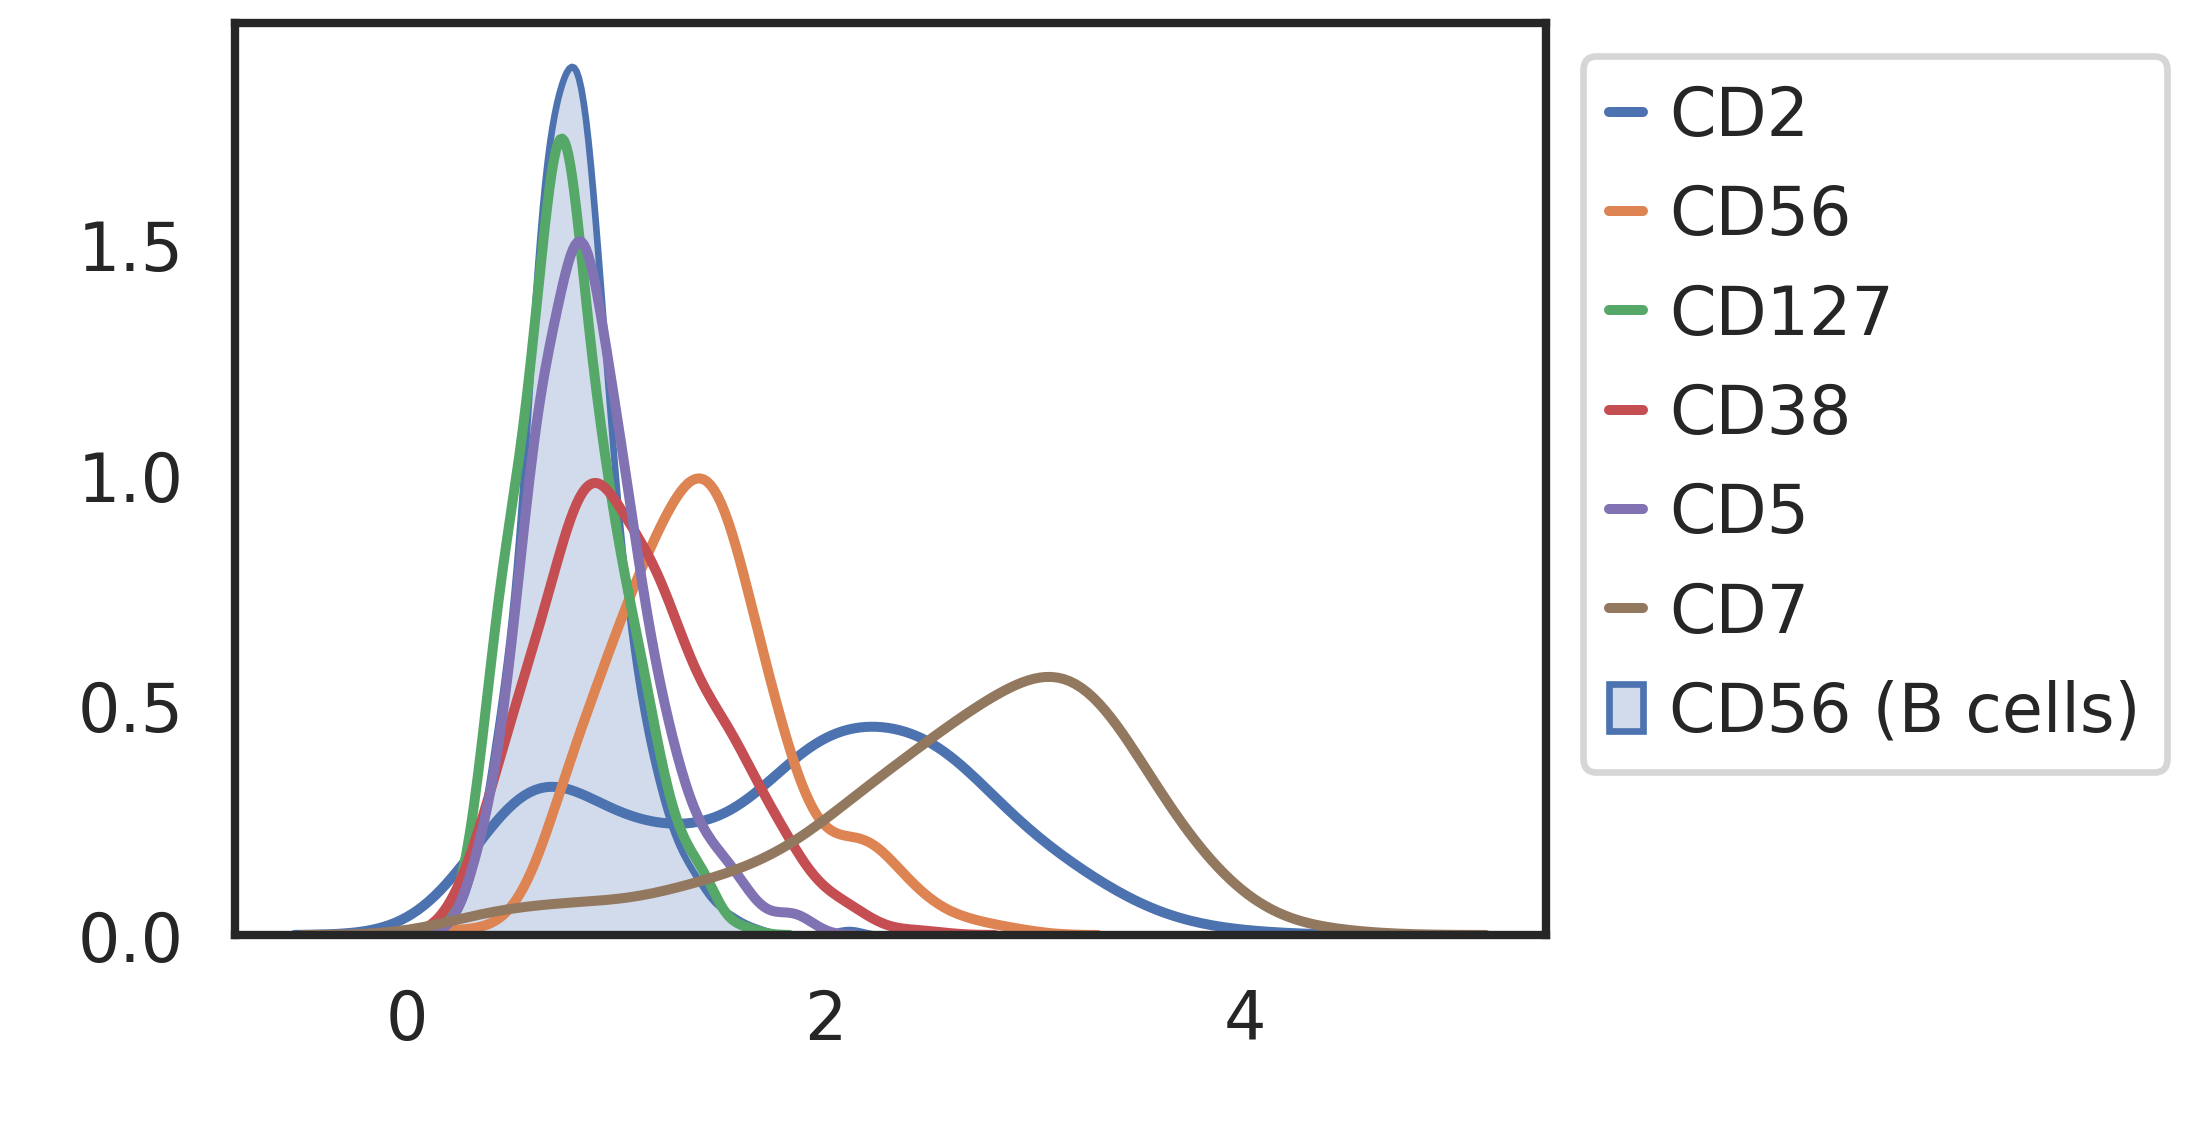

In [66]:
#CLR

#DSB

sns.set(style='white', font_scale = 0.5, context='poster', rc={'figure.figsize':(7,5)})


markers = nk_markers

for marker in markers:
    a= sns.kdeplot(clr[marker],
                #fill=True,
                label = marker)
sns.kdeplot(clr_b["CD56"],
            fill=True,
            label = "CD56 (B cells)")
    
# Plot formatting
plt.legend(prop={'size': 20}, loc='upper right', bbox_to_anchor=(1.5, 1))
#plt.title('Density Plots for selected NK markers, DSB normalized, all aplastic anemia samples')
plt.xlabel(' ')
plt.ylabel(' ')

a.tick_params(axis='y', labelsize=20)
a.tick_params(axis='x', labelsize=20)

plt.show()

### Proportion plots

In [ ]:
#Sample names
samples=adata_nk.obs['SAMPLE_CODE'].unique().tolist()

samples

In [48]:
#add cell type columns

dsb = dsb.assign(cell_type = "NK cell")
clr = clr.assign(cell_type = "NK cell")

dsb_b = dsb_b.assign(cell_type = "B cell")
clr_b = clr_b.assign(cell_type = "B cell")

In [50]:
#Combined df

df_dsb=pd.concat([dsb, dsb_b], axis=0)

df_dsb.shape

(860, 34)

In [51]:
#Combined df

df_clr=pd.concat([clr, clr_b], axis=0)

df_clr.shape

(860, 34)

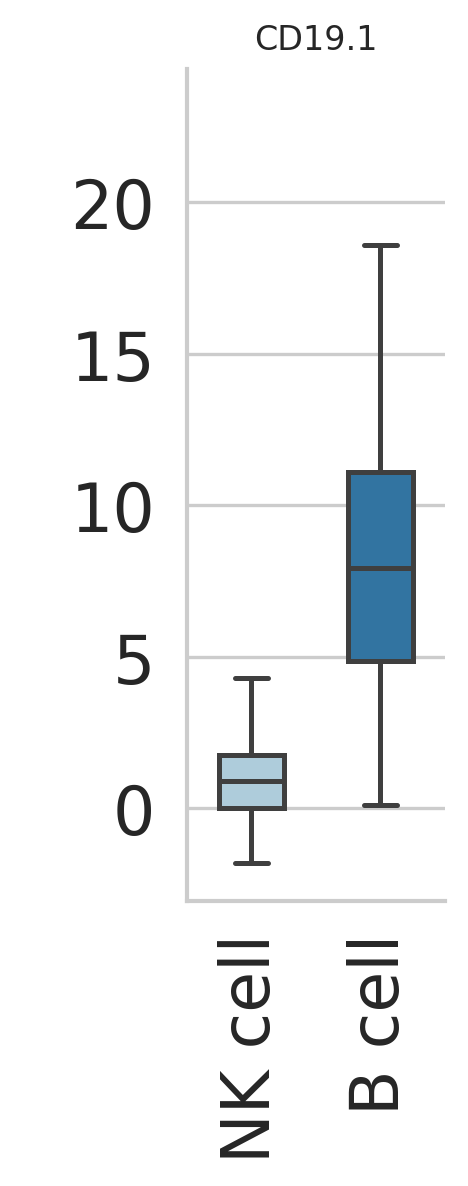

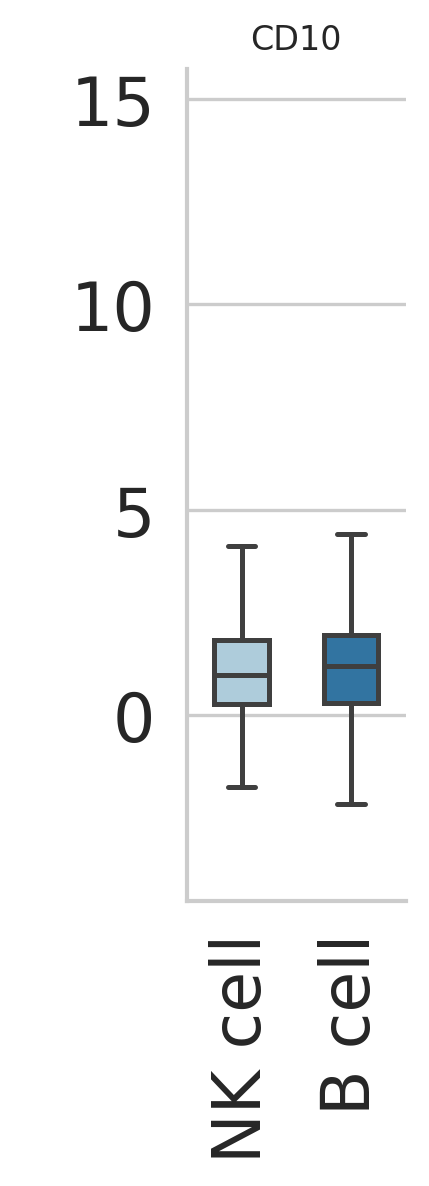

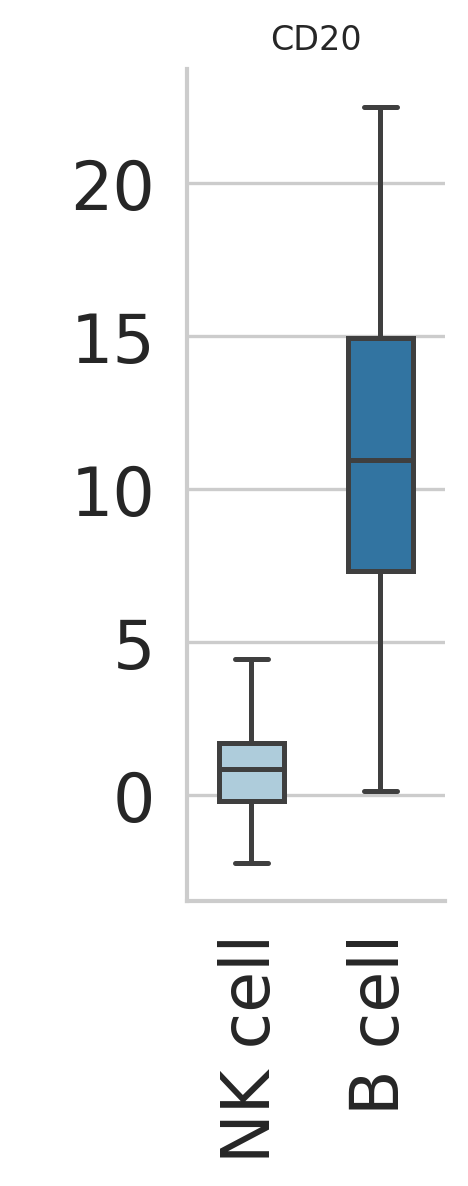

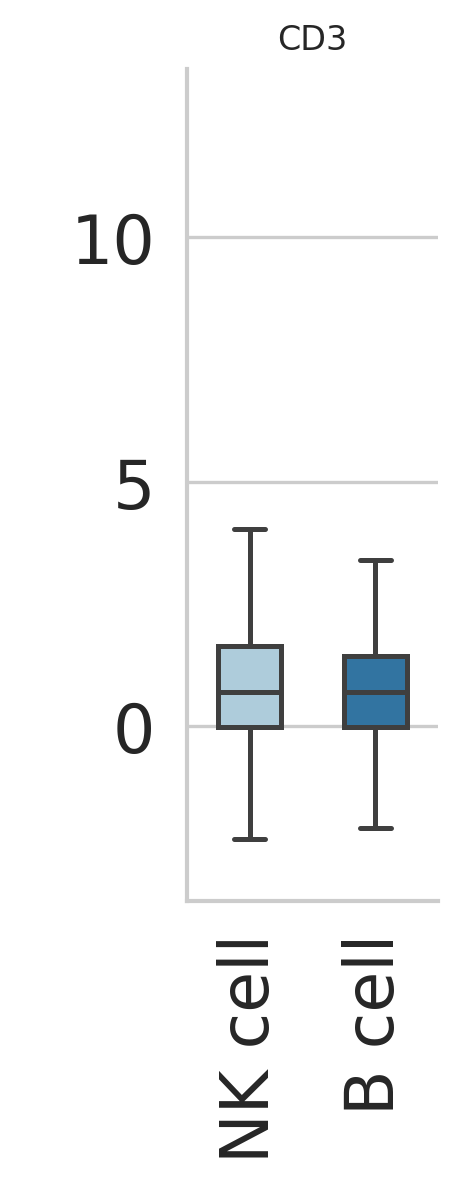

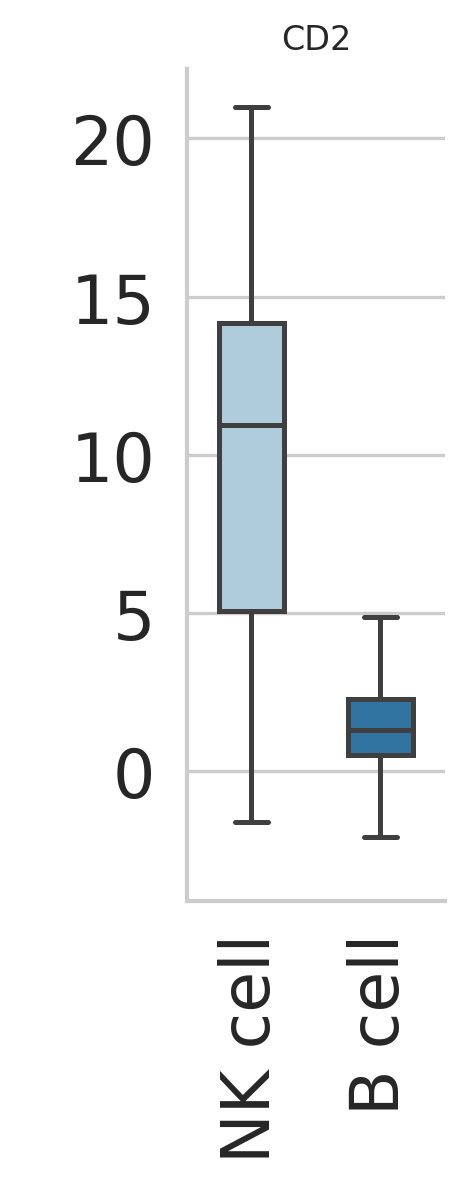

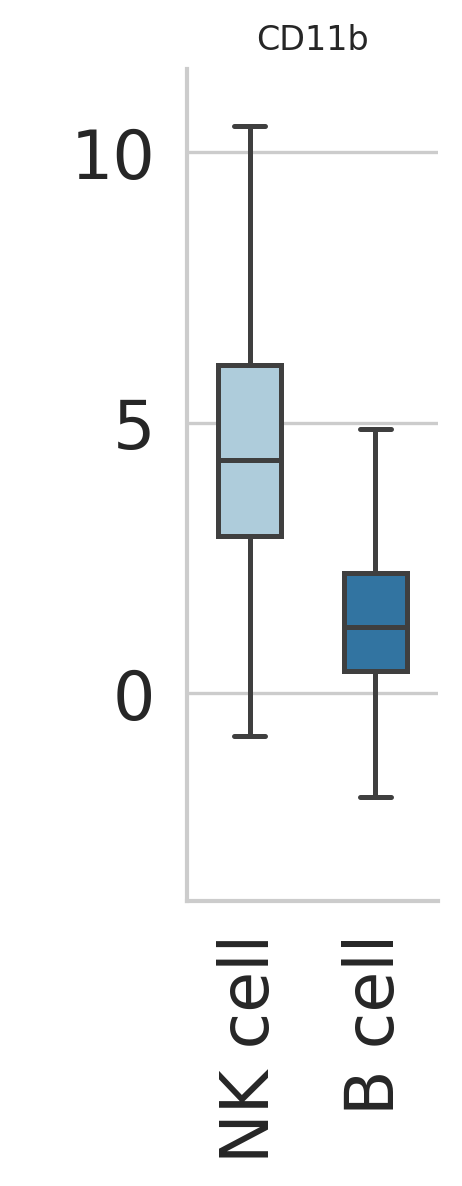

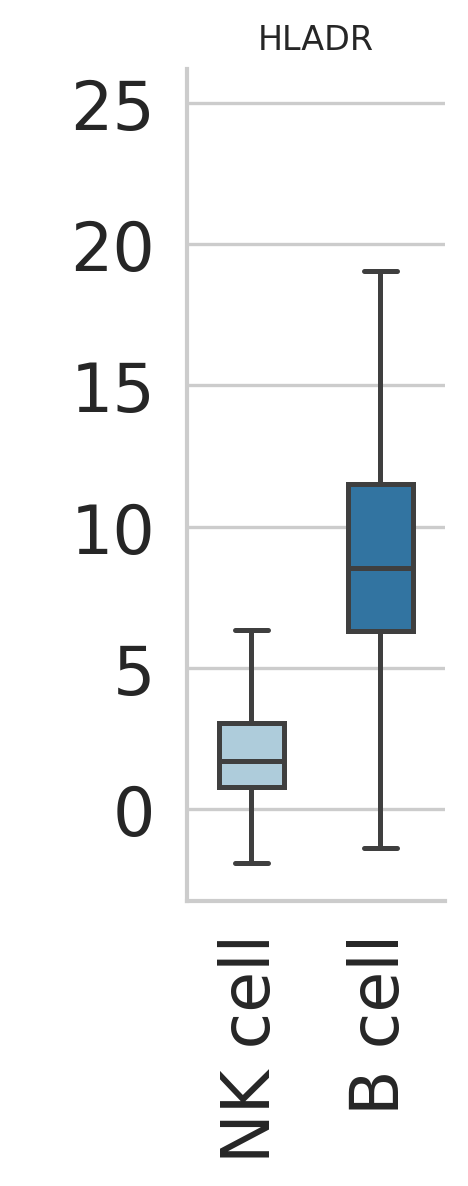

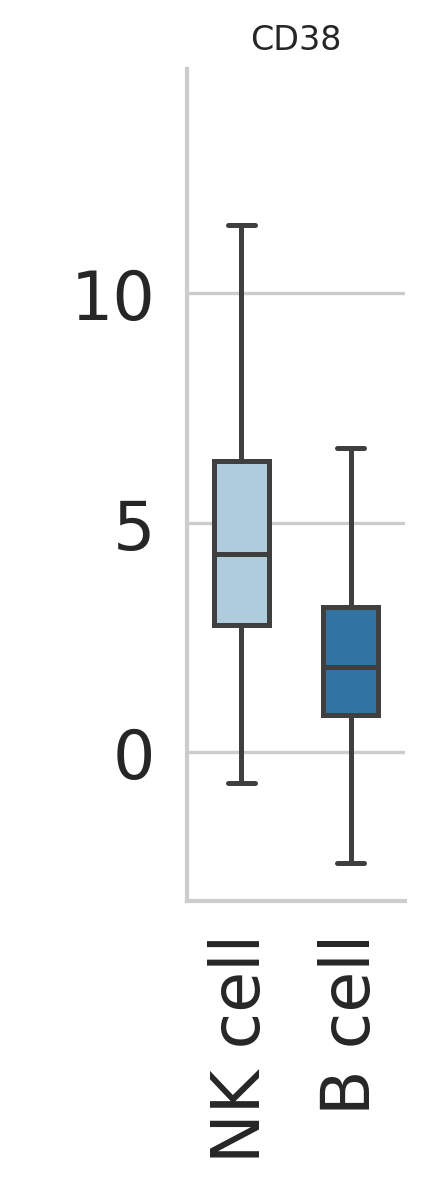

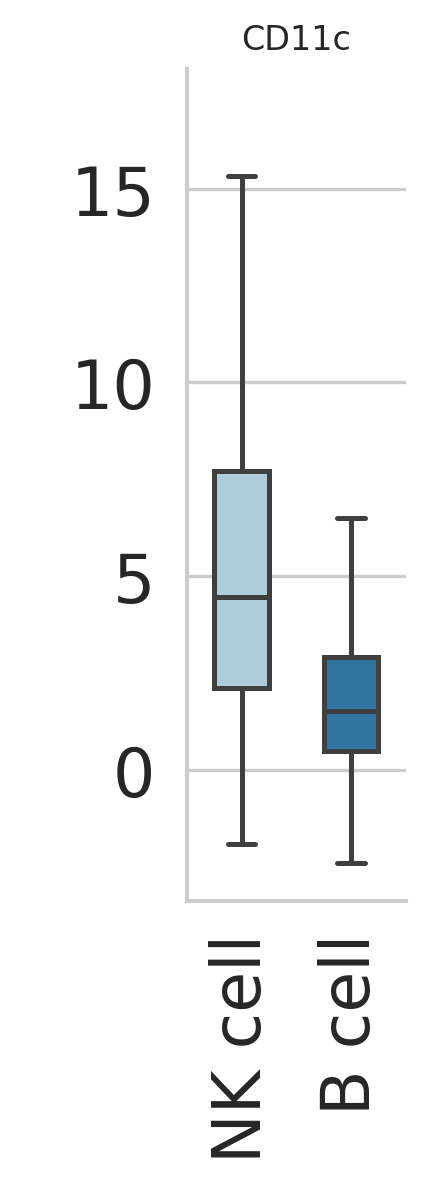

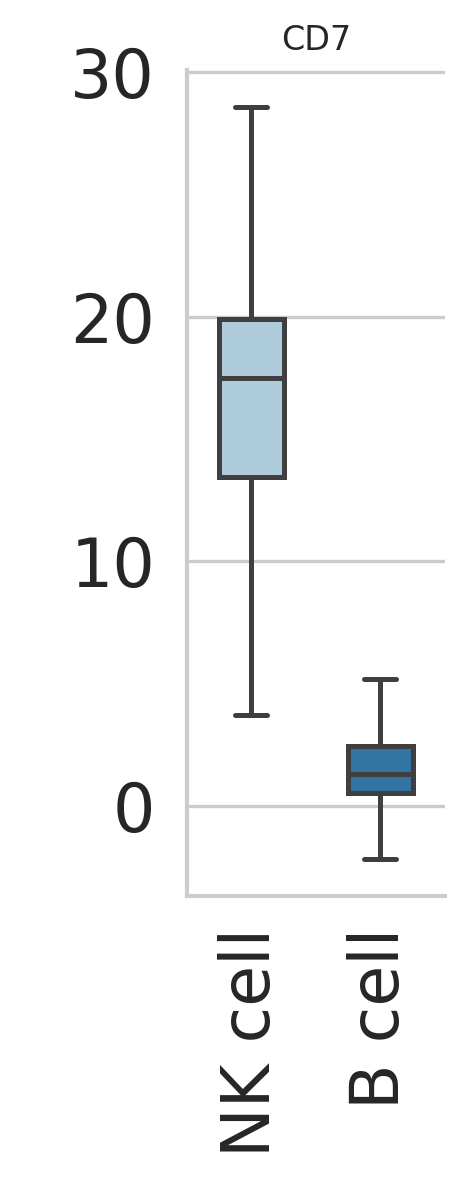

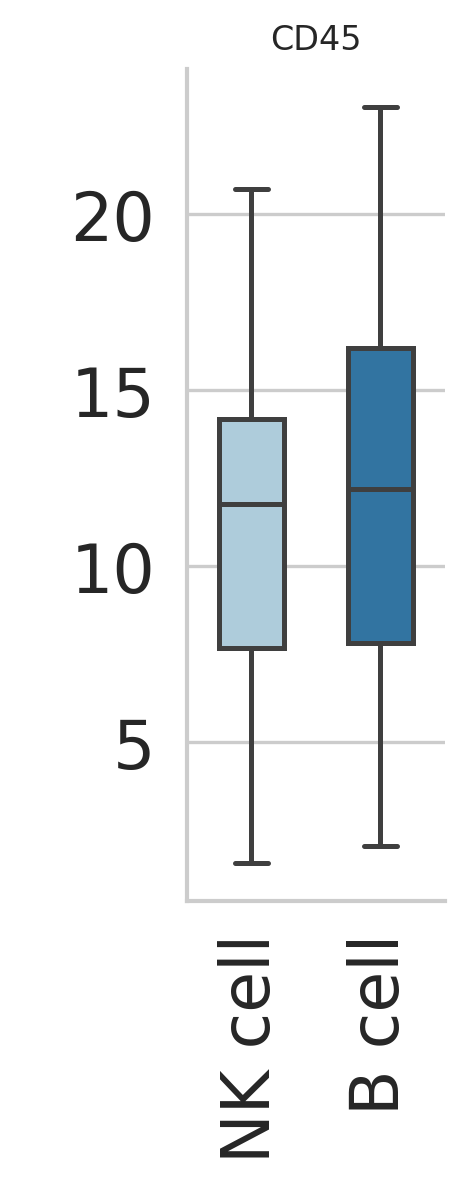

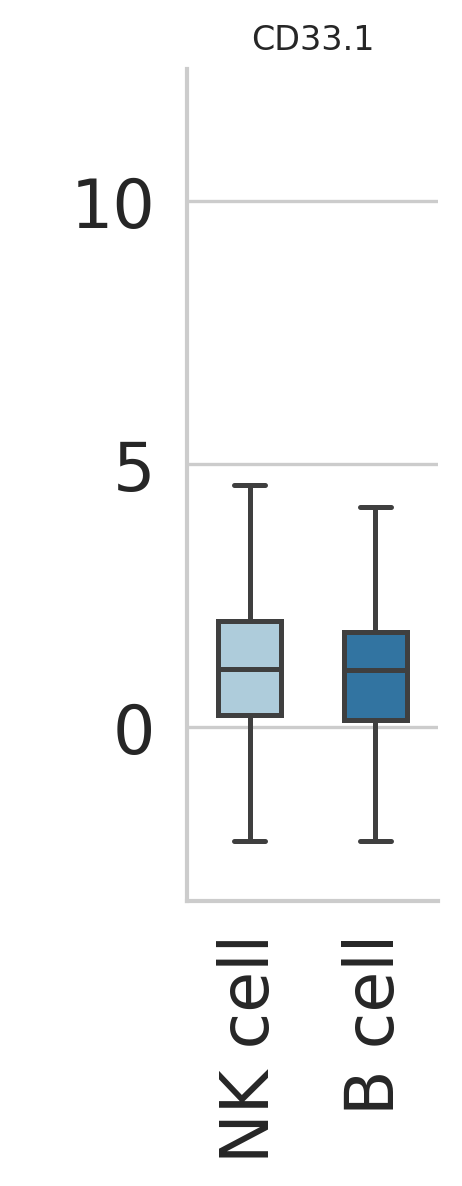

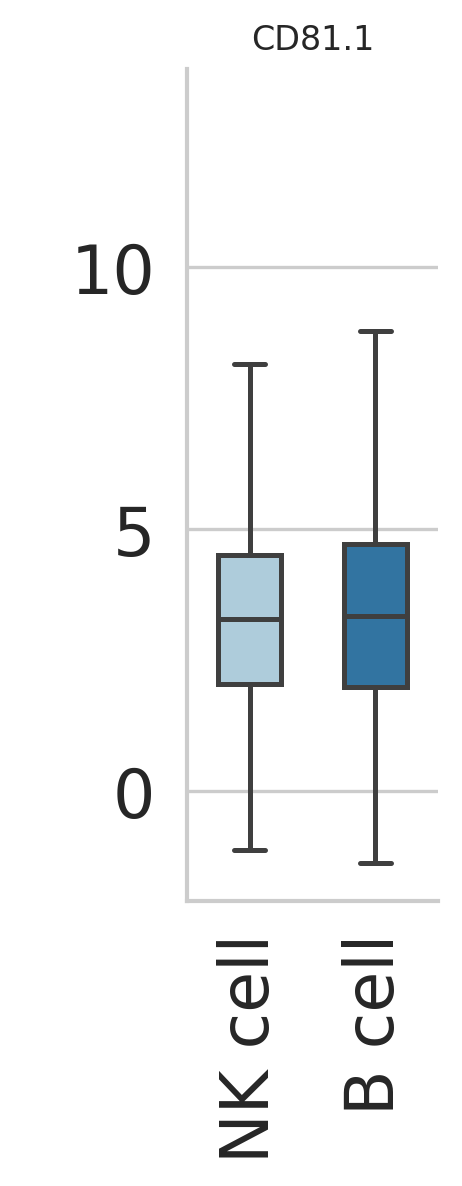

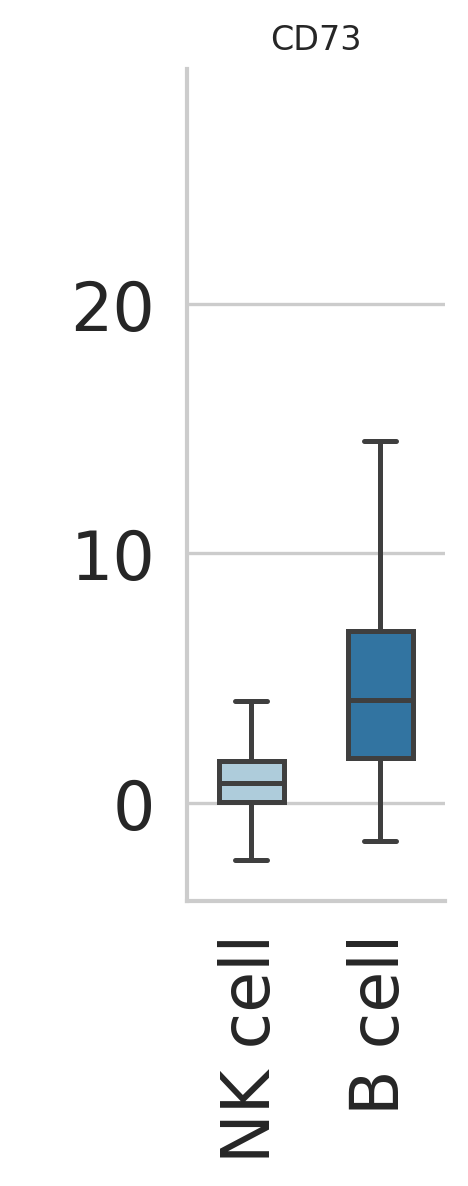

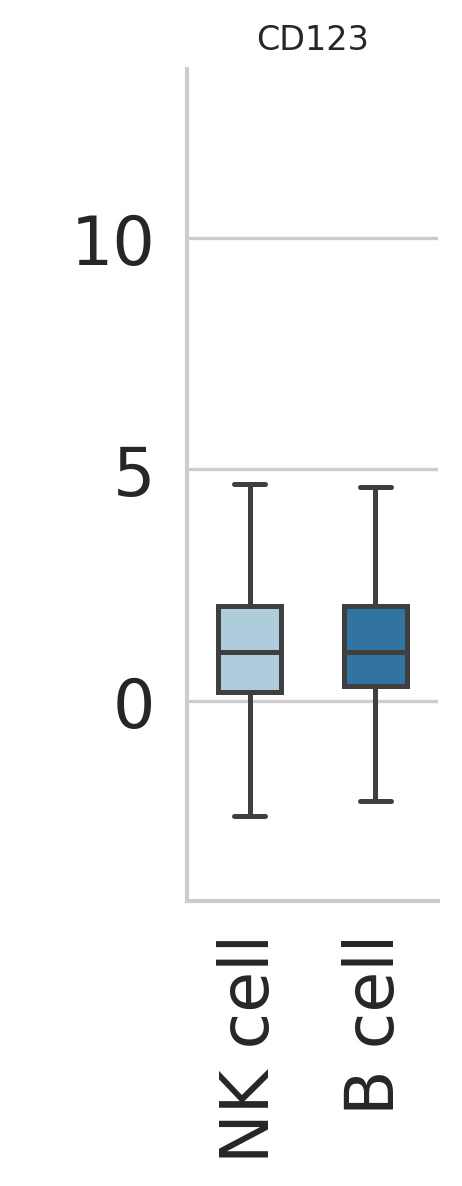

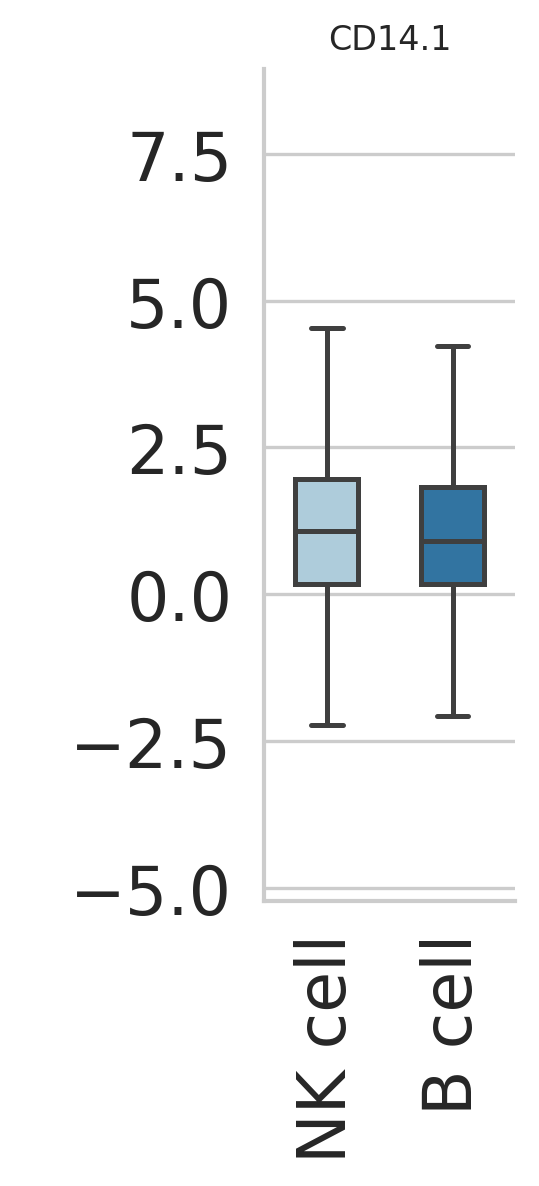

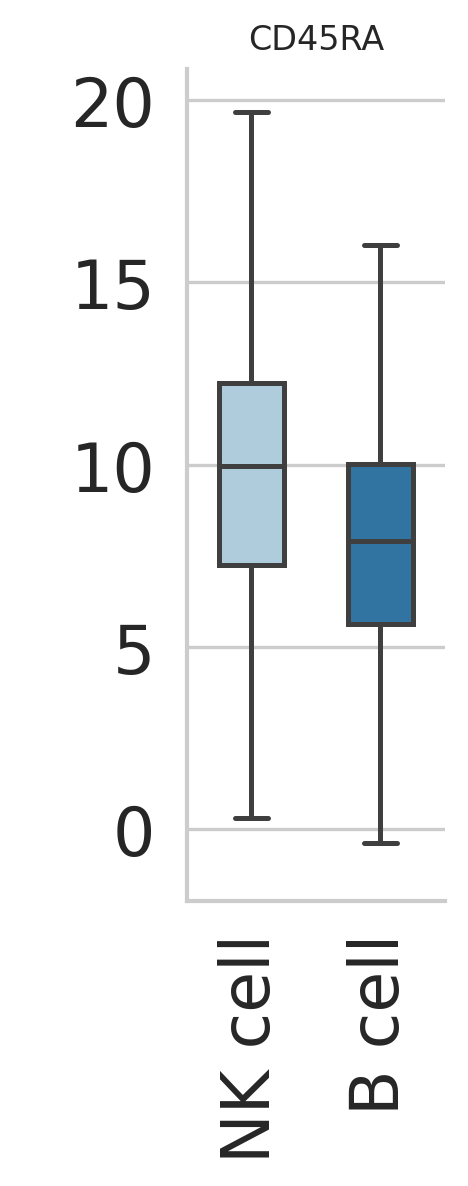

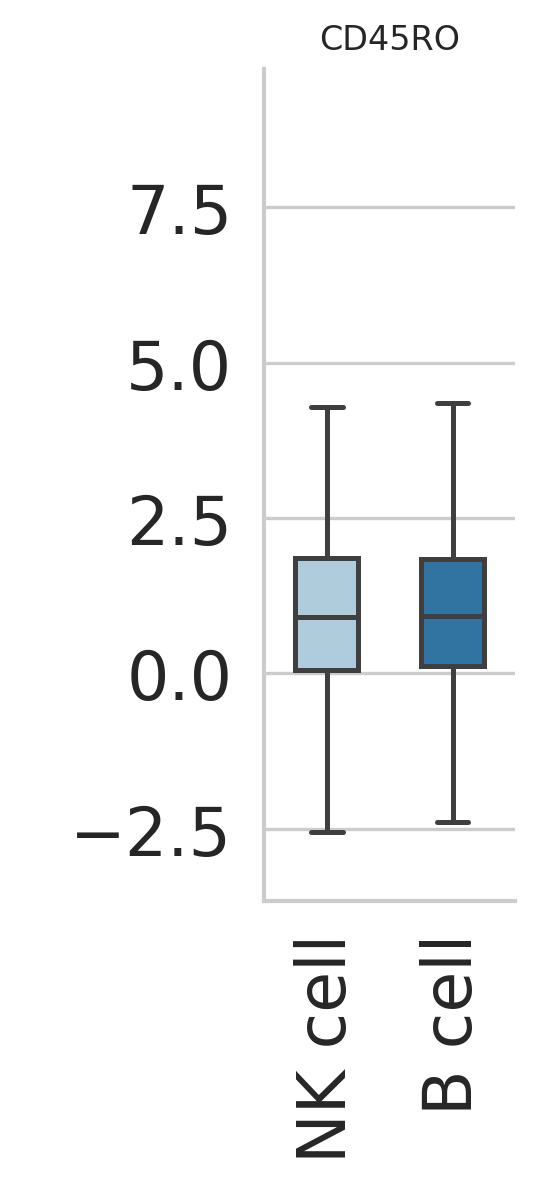

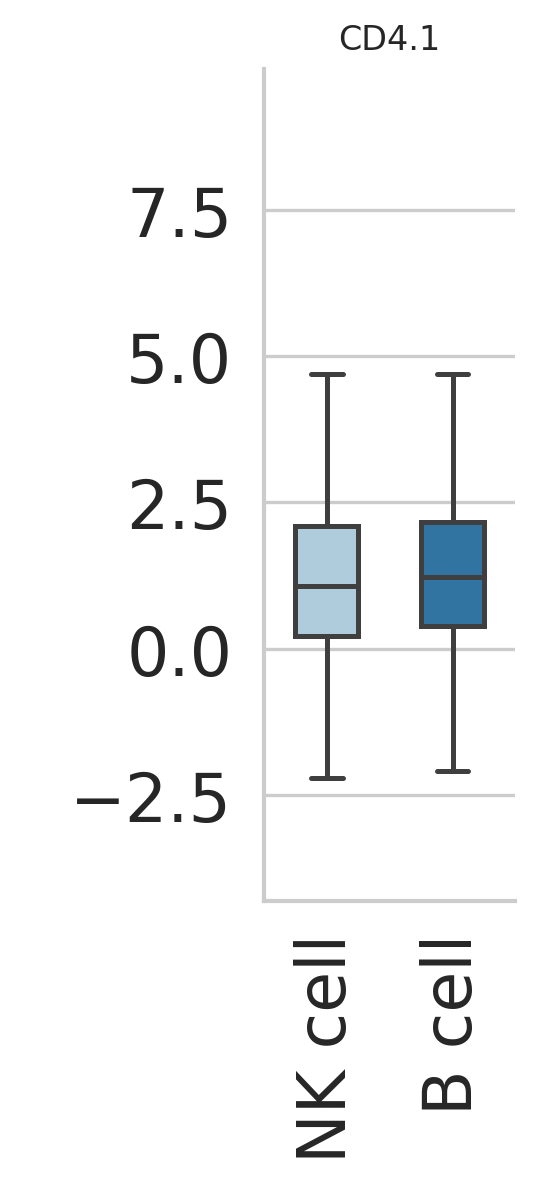

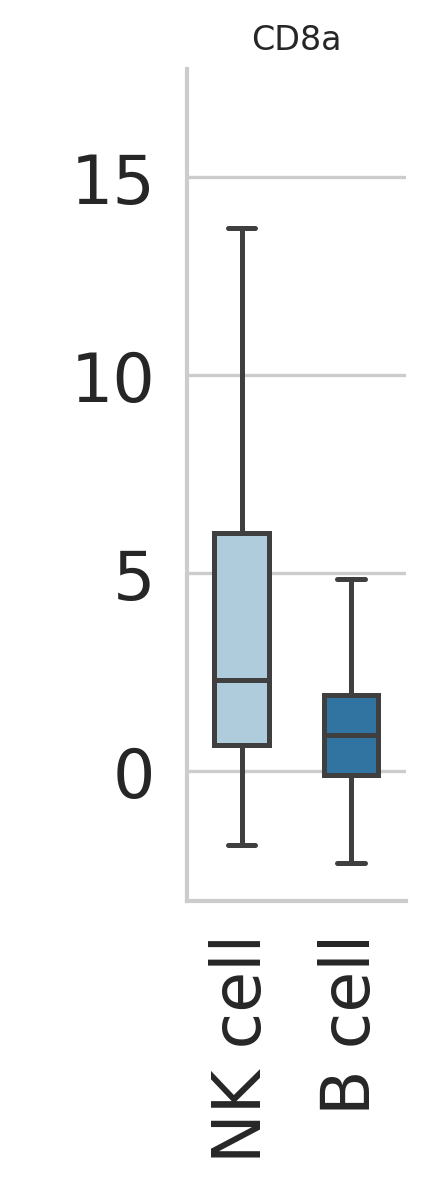

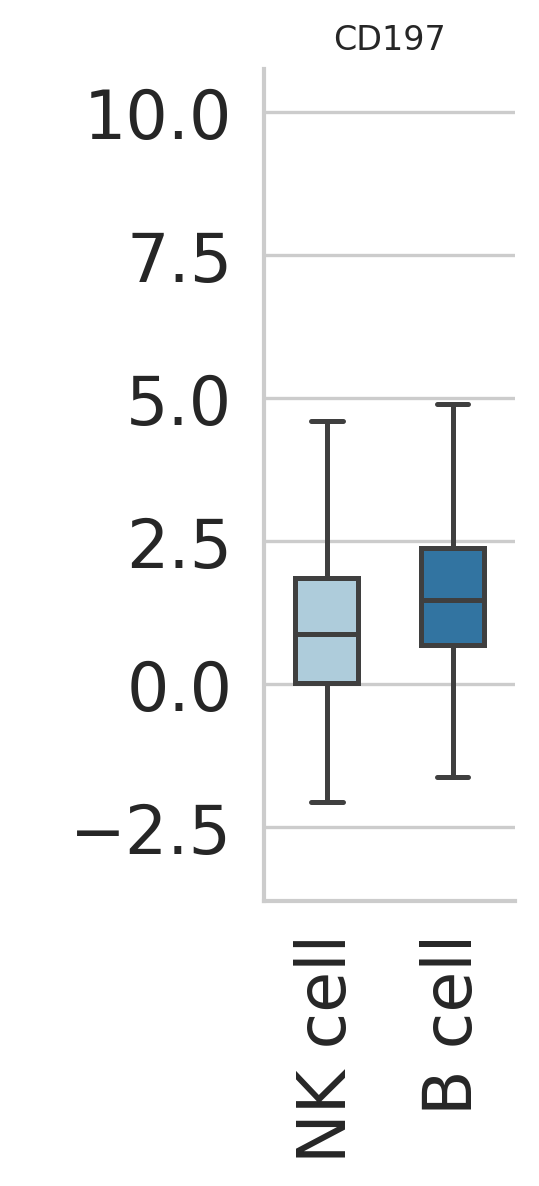

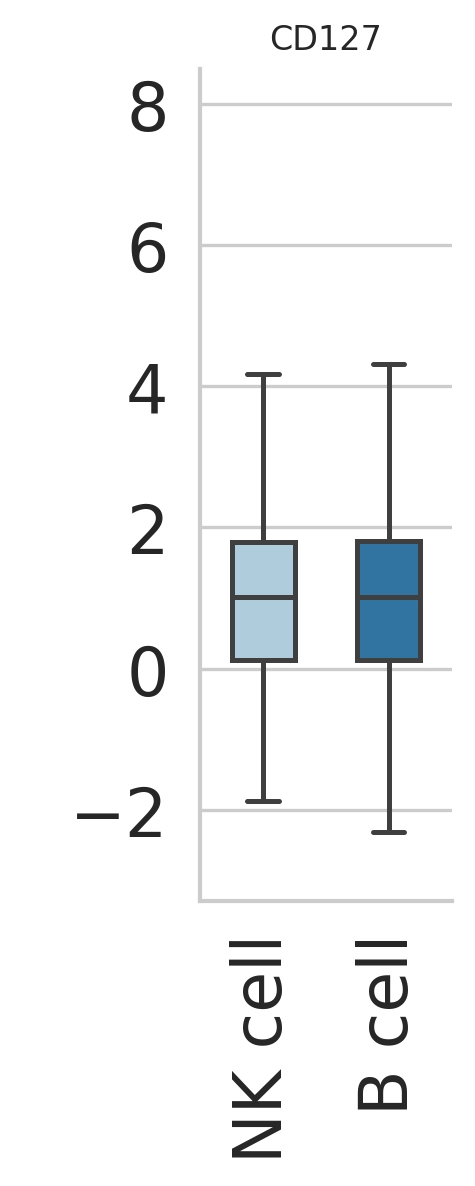

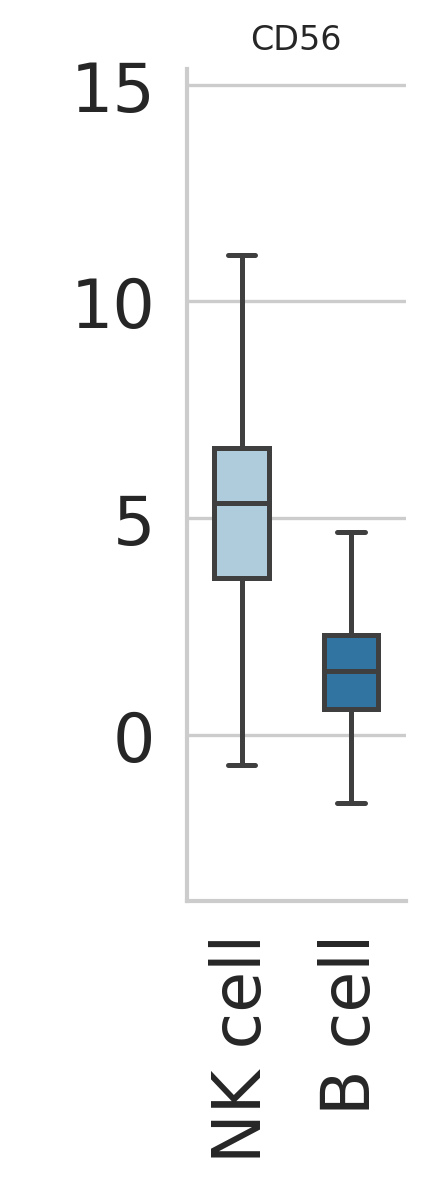

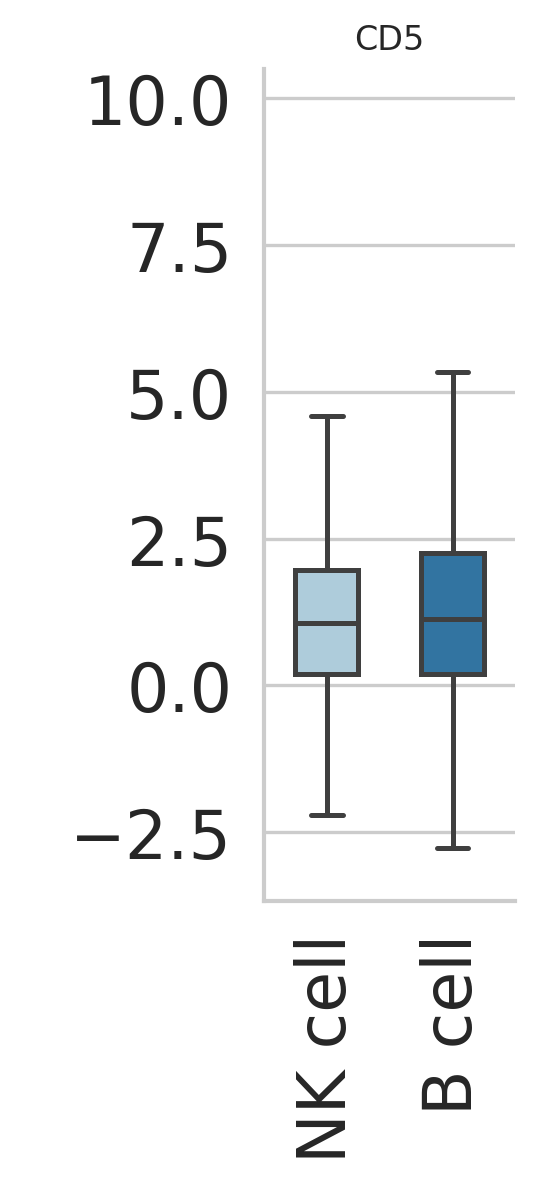

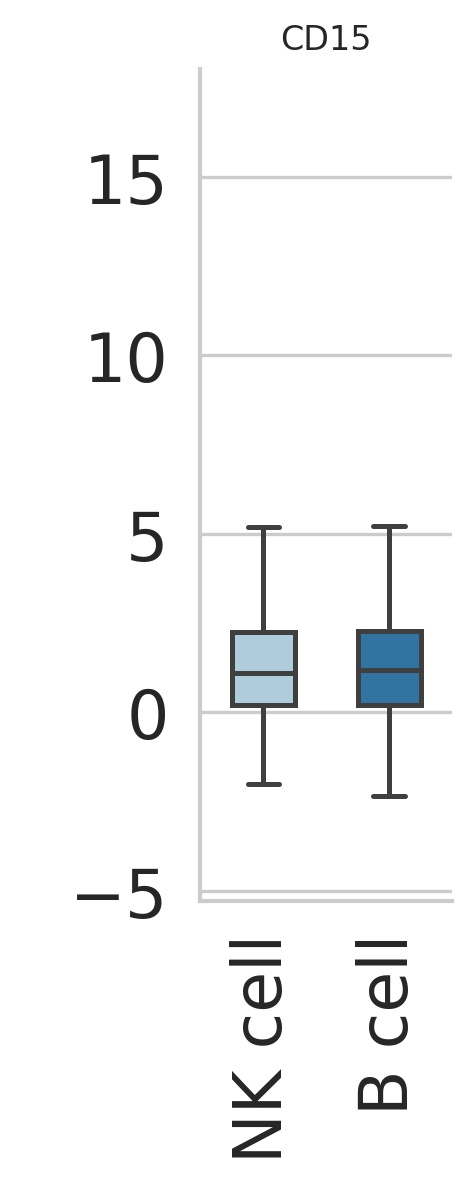

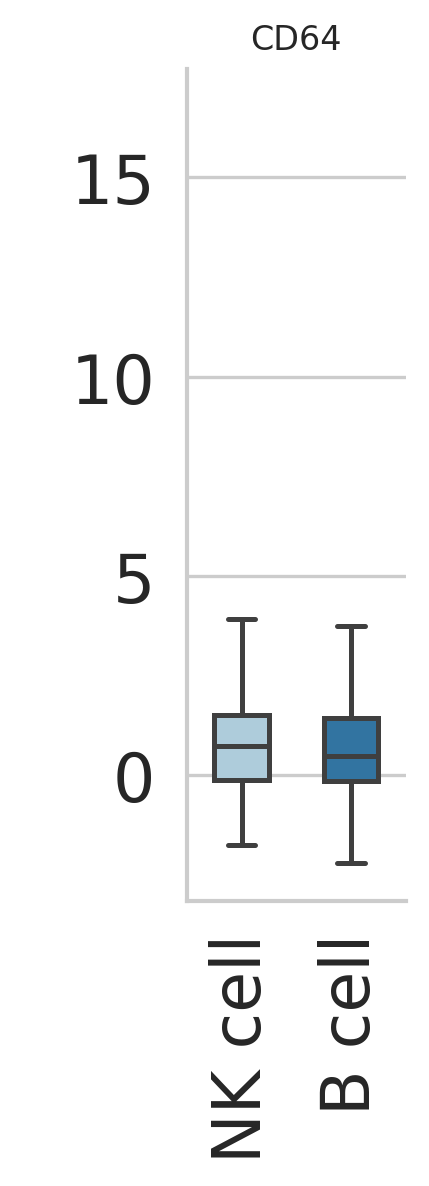

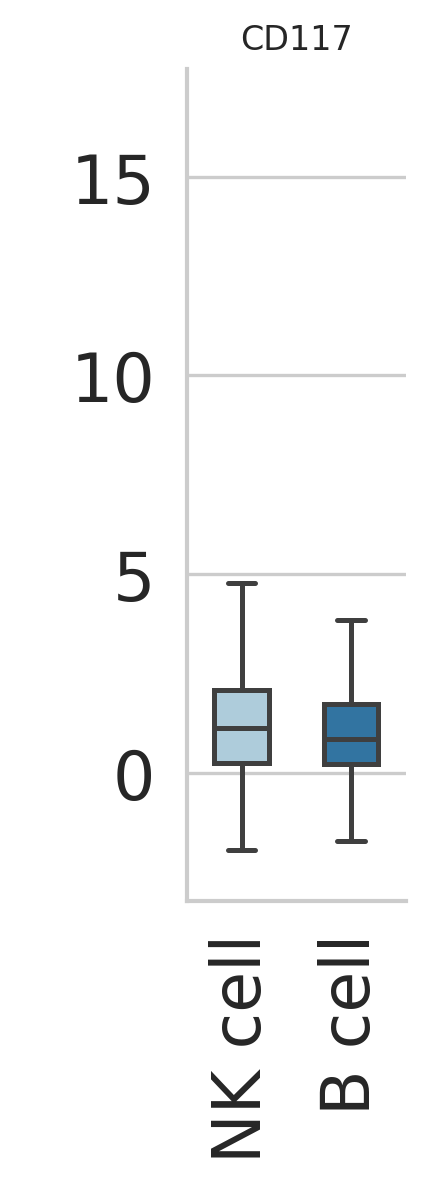

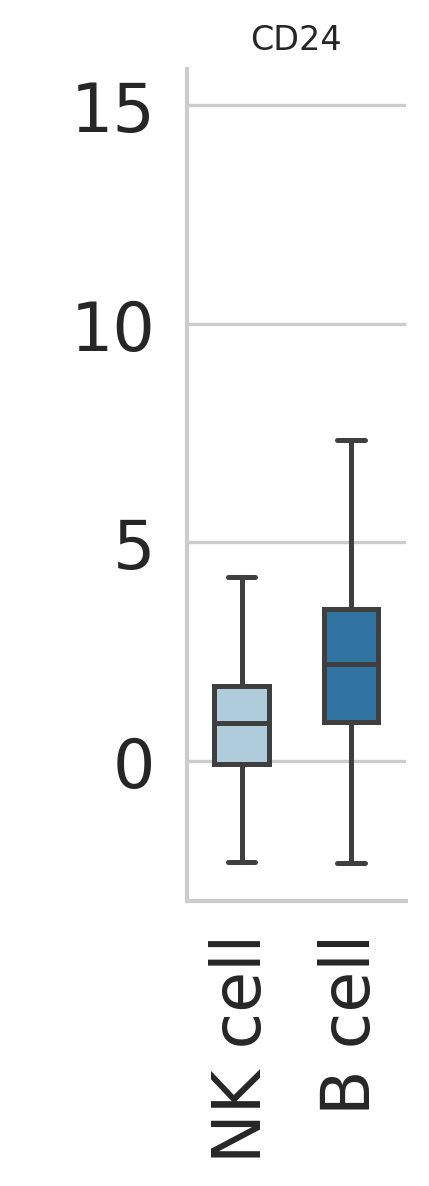

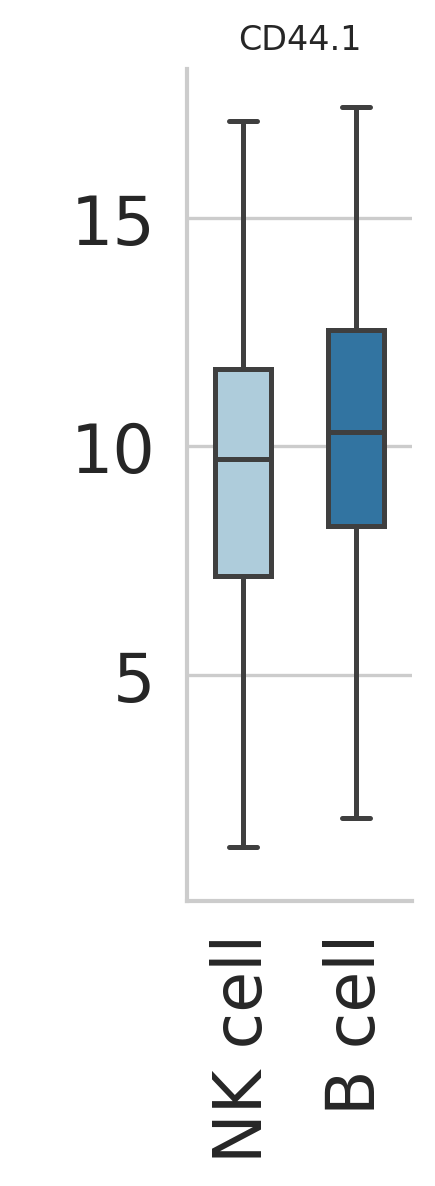

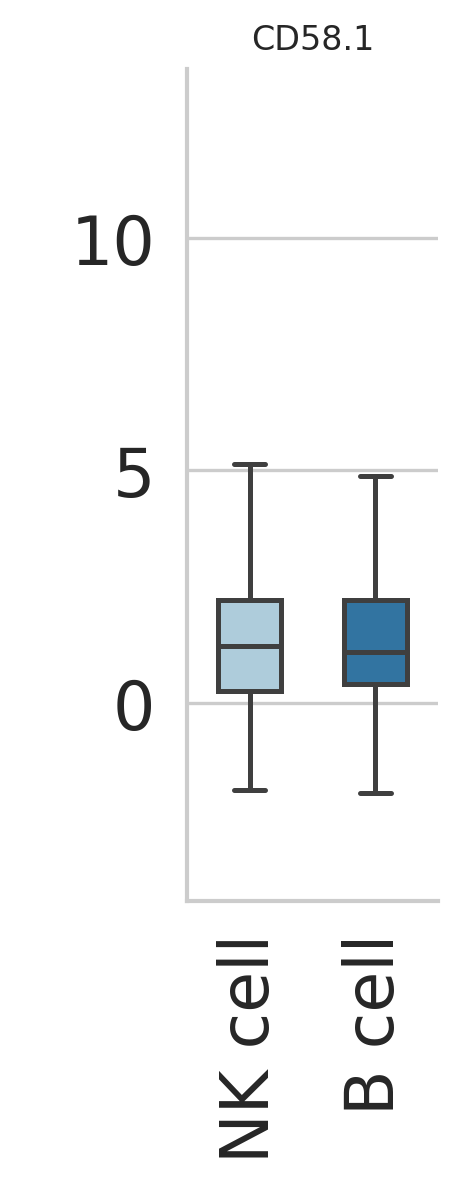

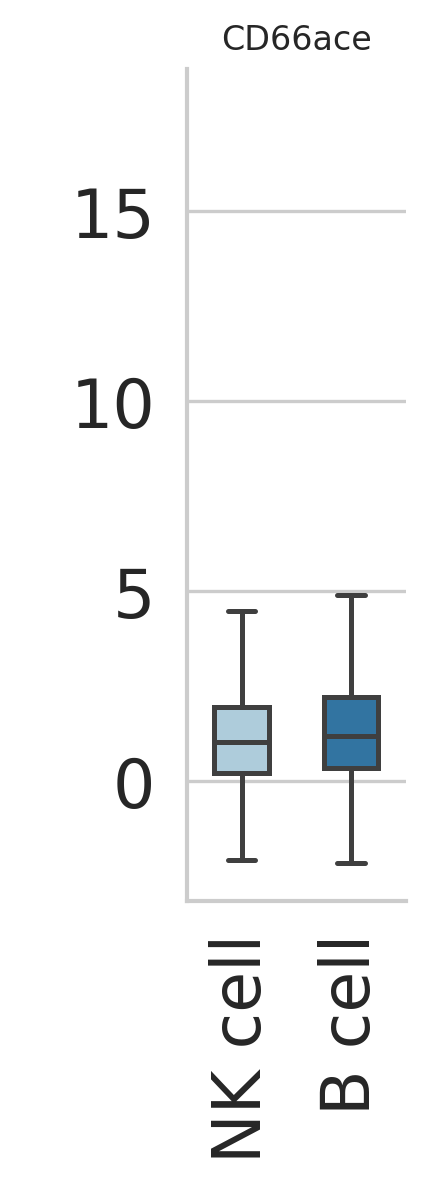

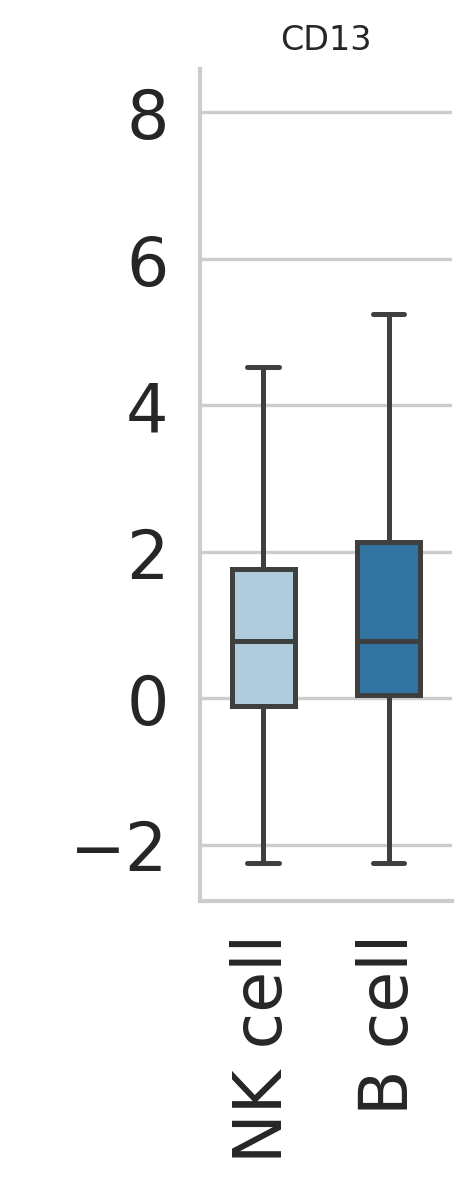

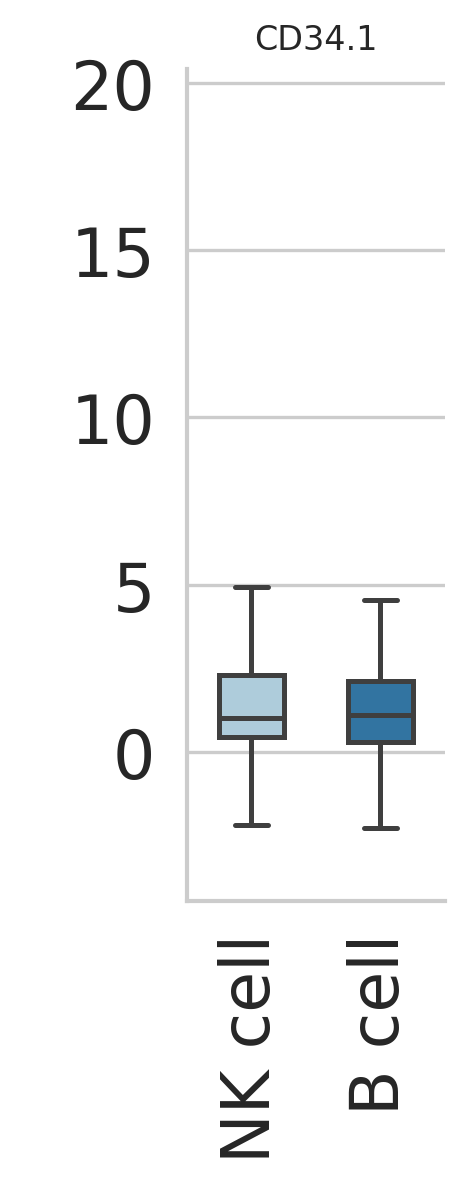

In [53]:
#DSB

for prot in df_dsb[df_dsb.columns[:-1]]:
    sns.set_theme(style = "whitegrid", font_scale= 0.7)
    ax=sns.catplot(x="cell_type", y=prot, hue="cell_type",
            aspect=.3,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=df_dsb,
            width = 0.5)
    ax.fig.set_size_inches(2, 4)
    ax.set_xticklabels(rotation = 90)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set(xlabel=None)
    ax.set_ylabels(' ', fontsize= 10)
    plt.title(prot, fontsize=10)

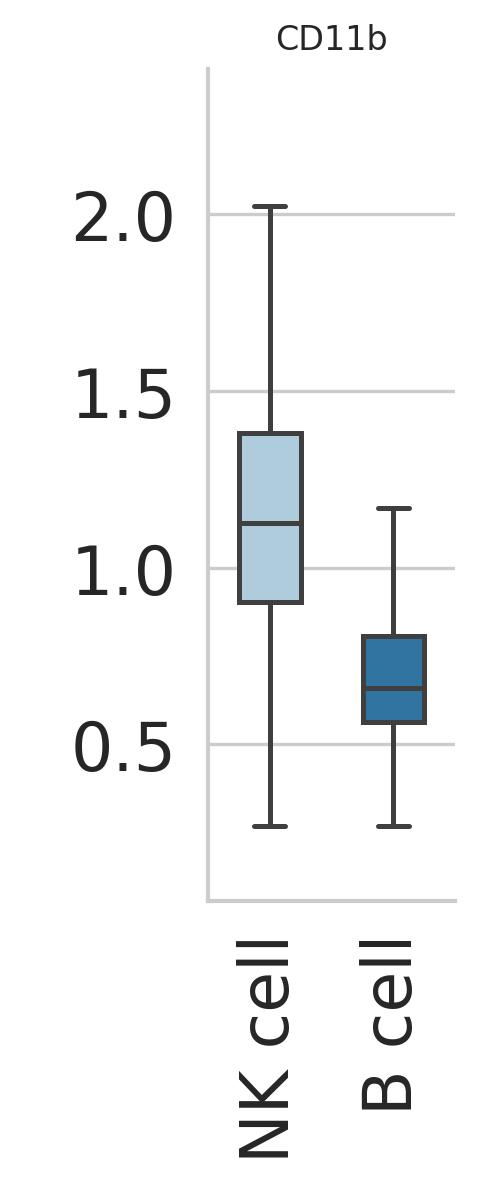

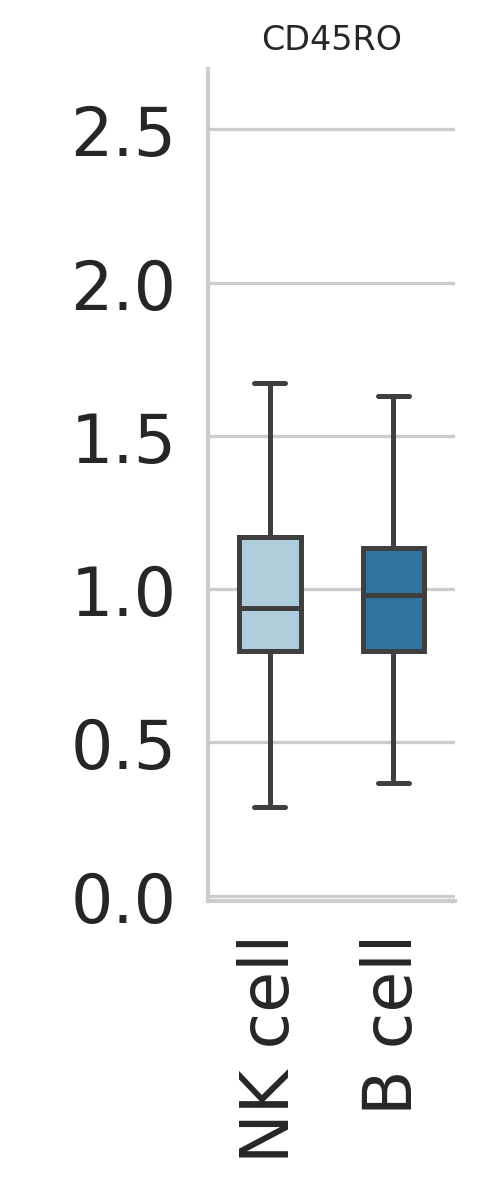

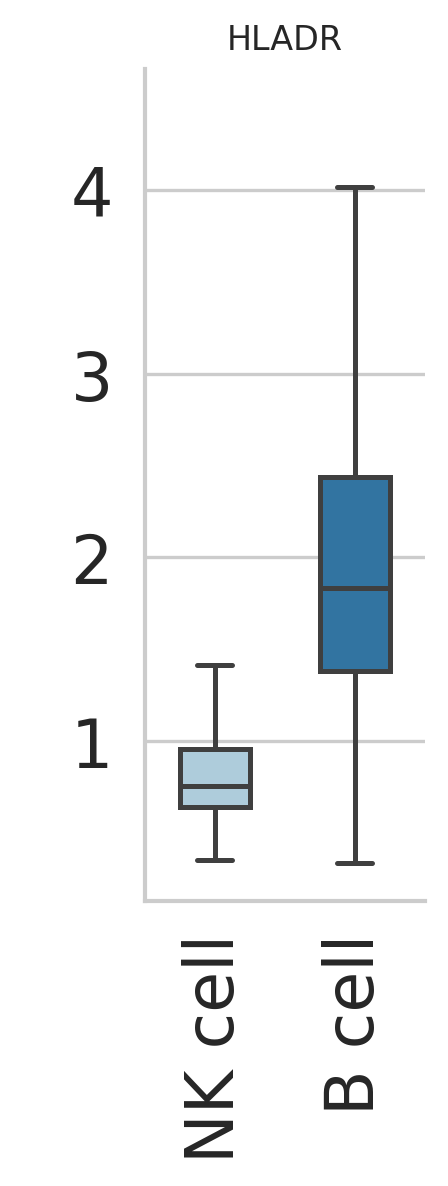

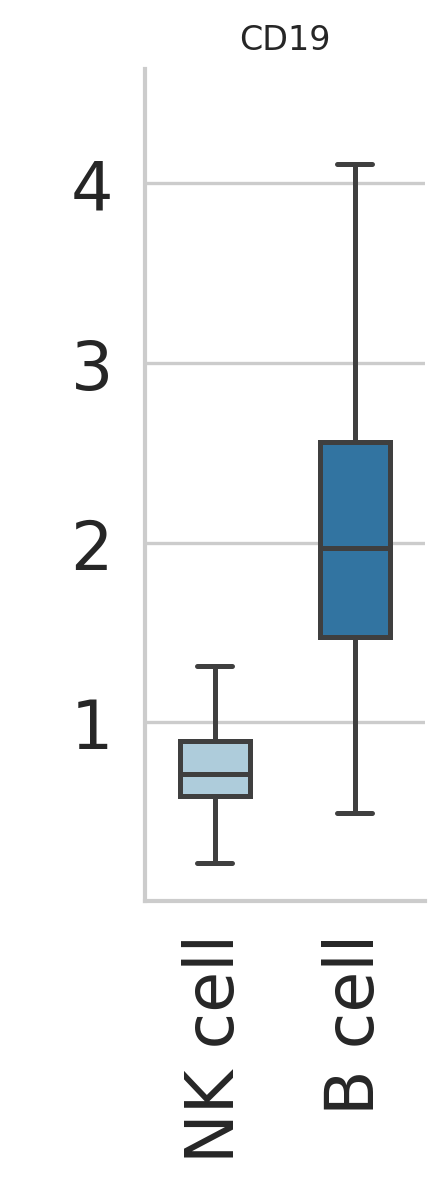

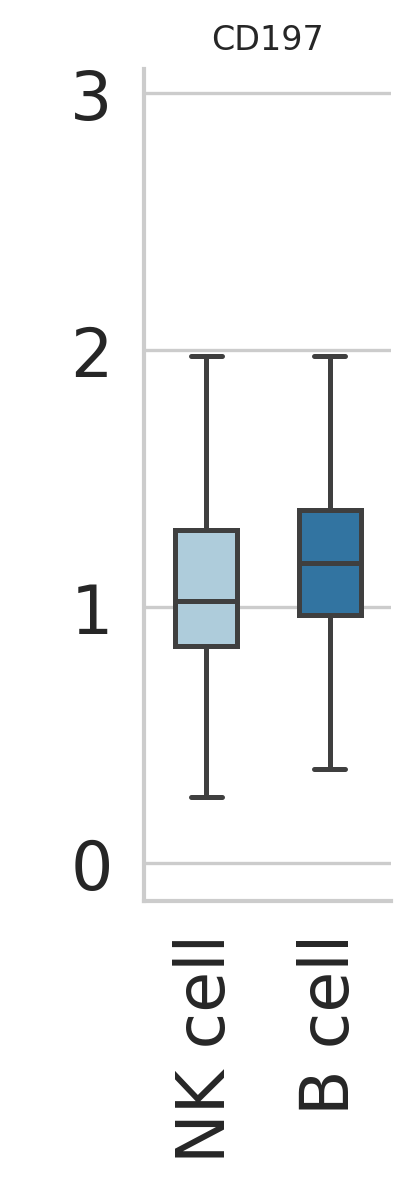

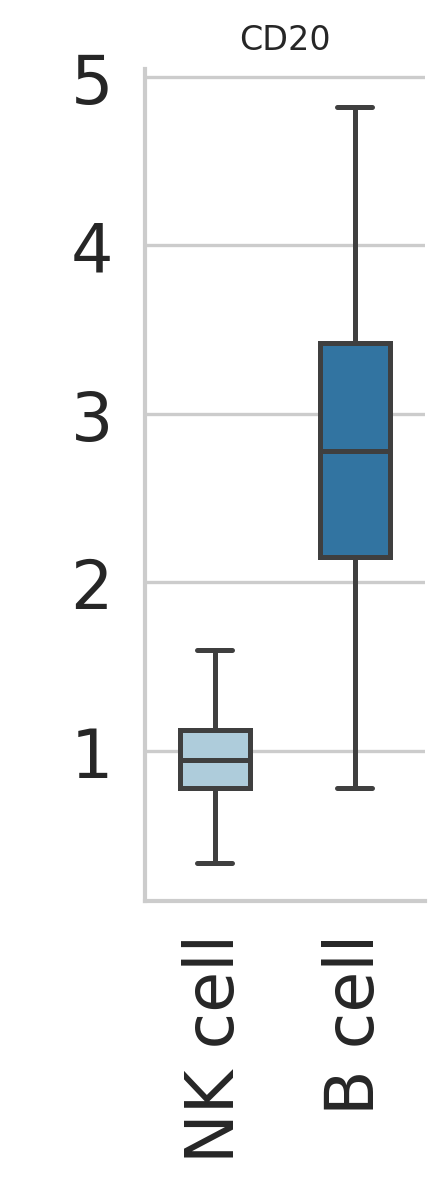

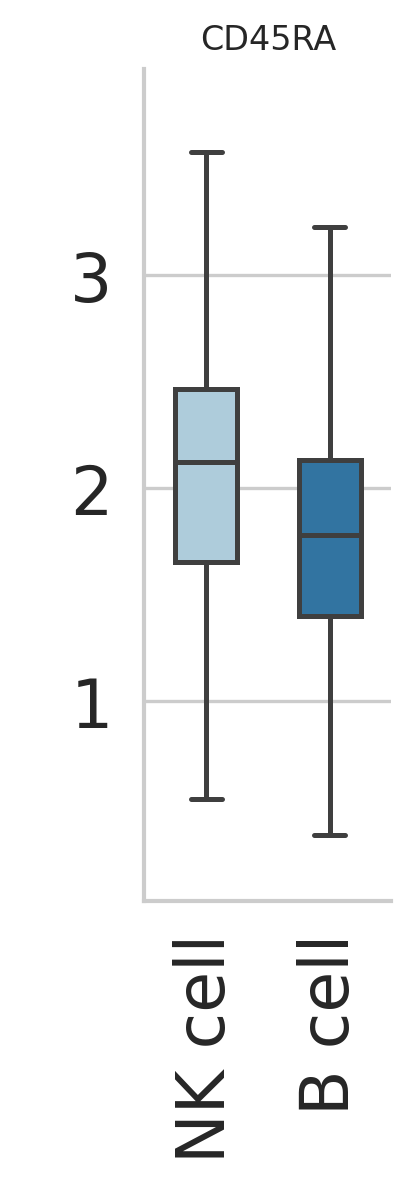

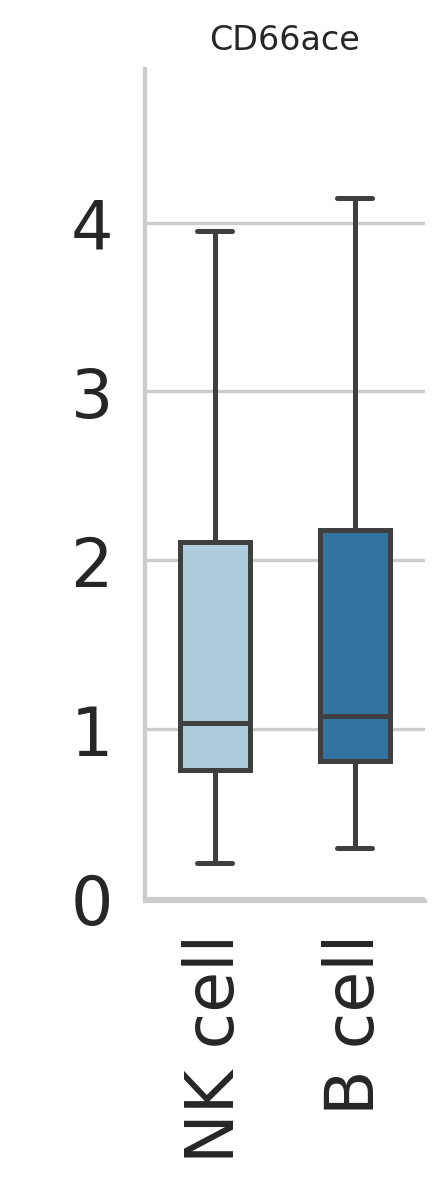

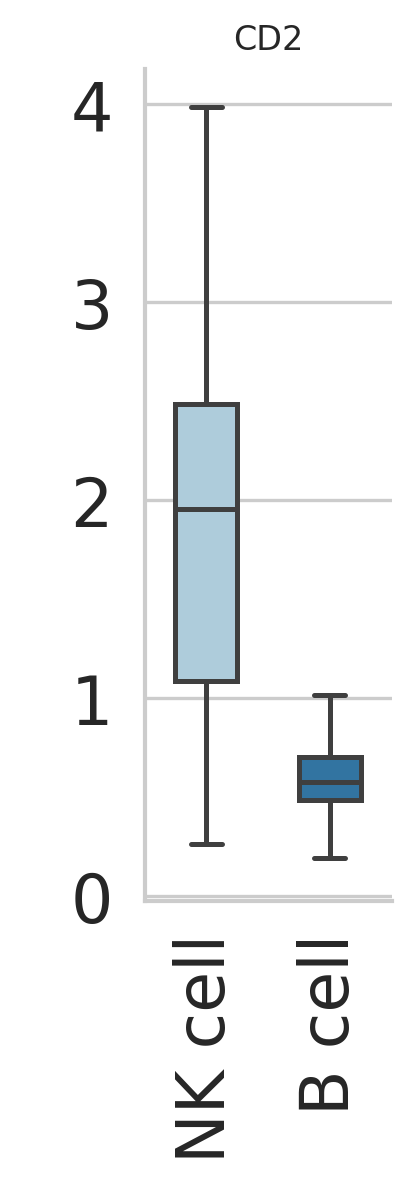

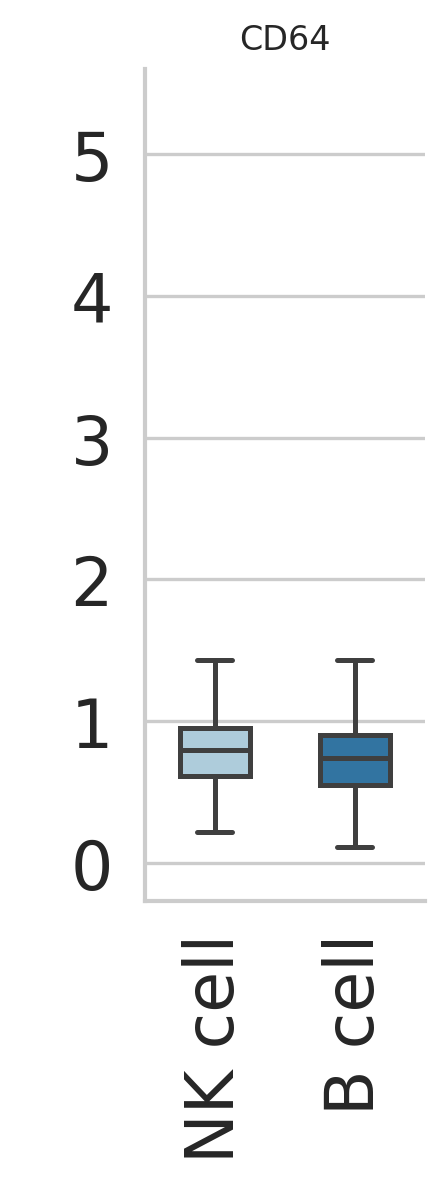

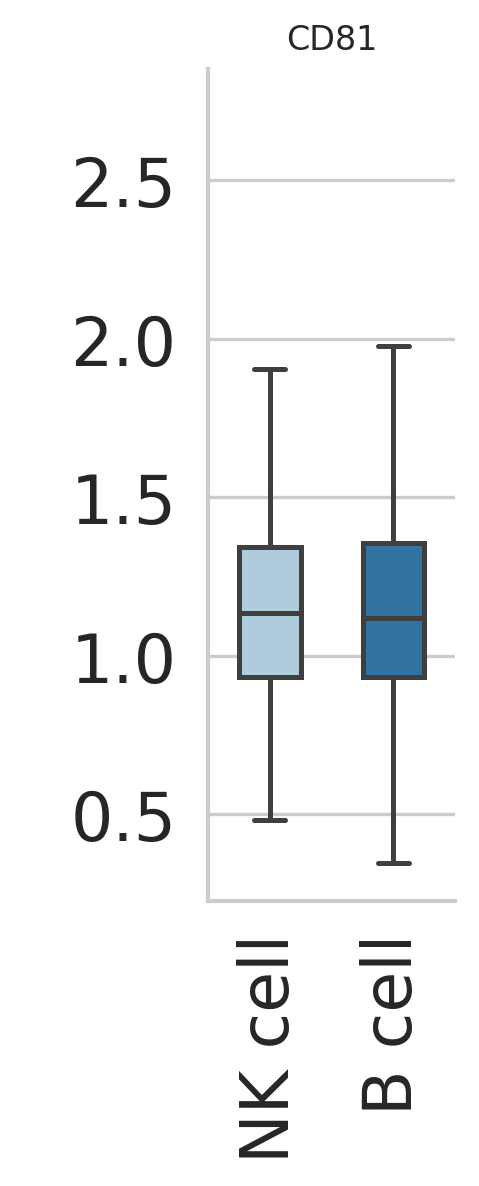

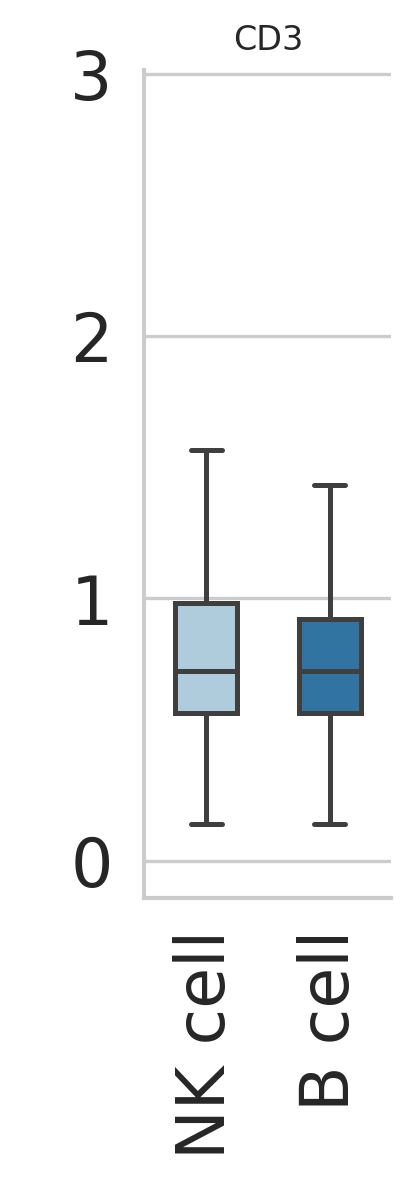

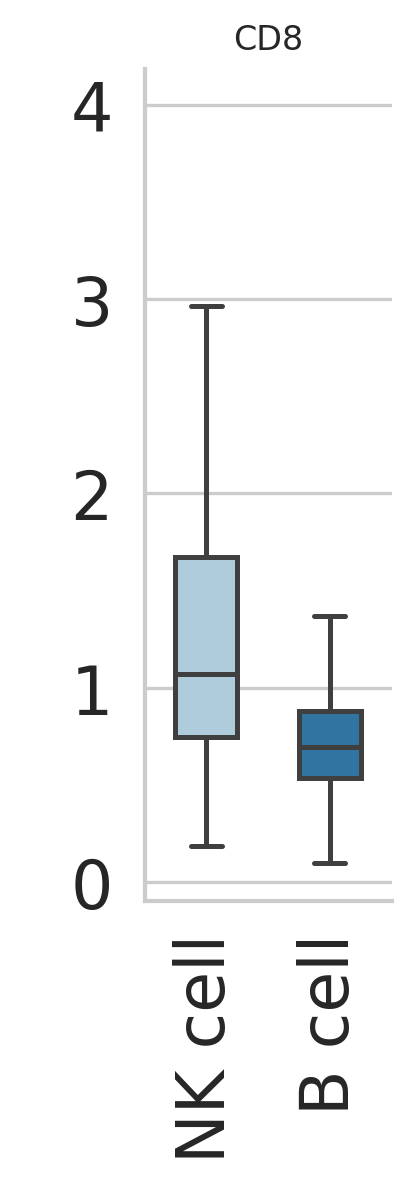

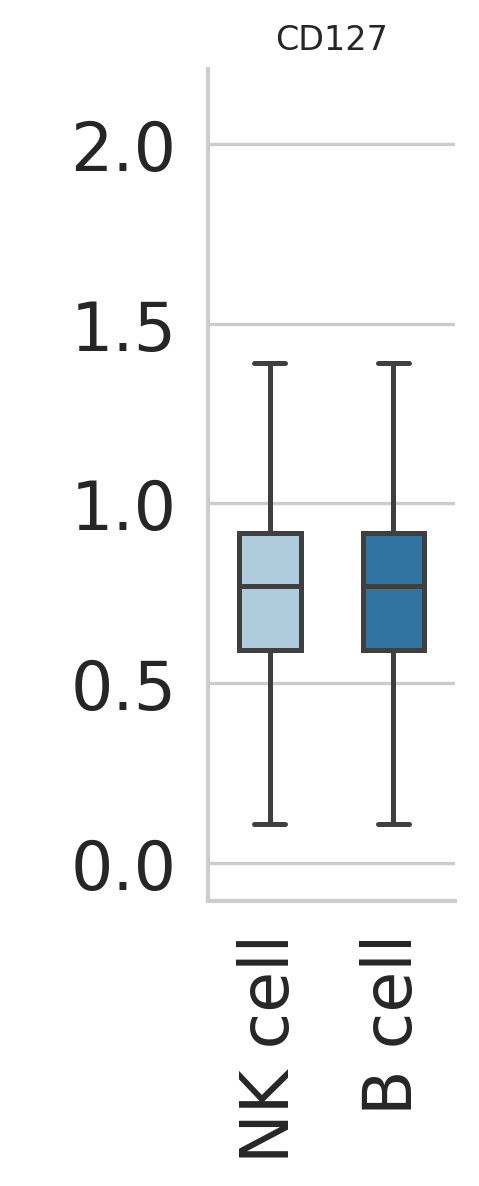

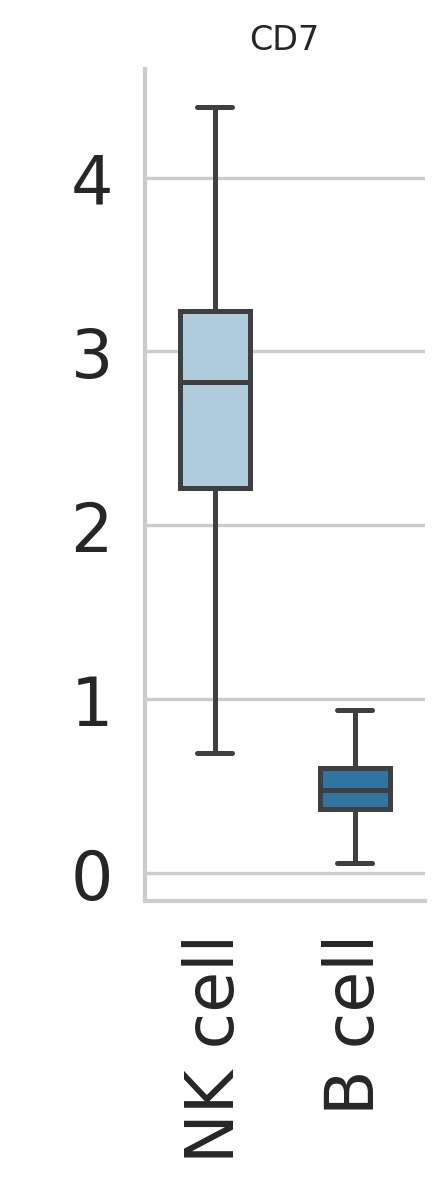

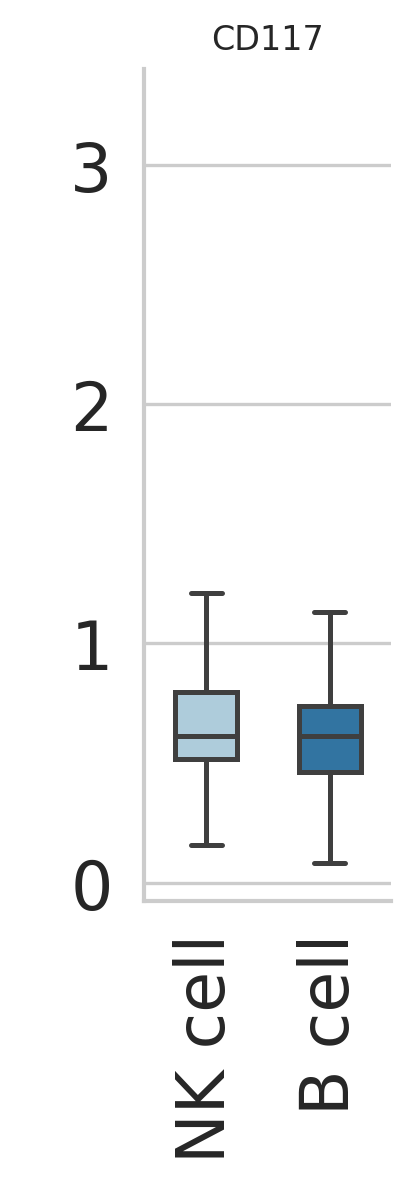

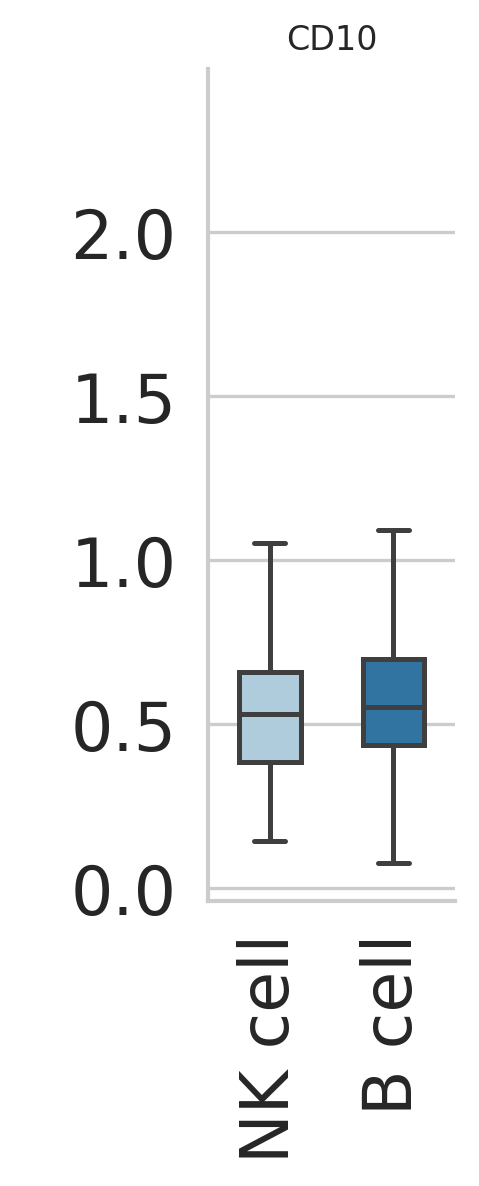

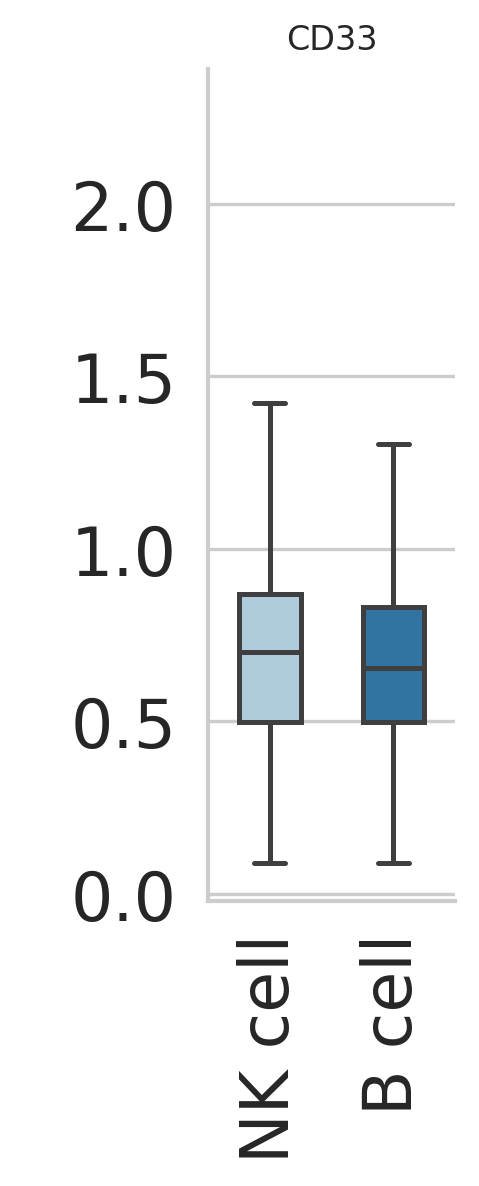

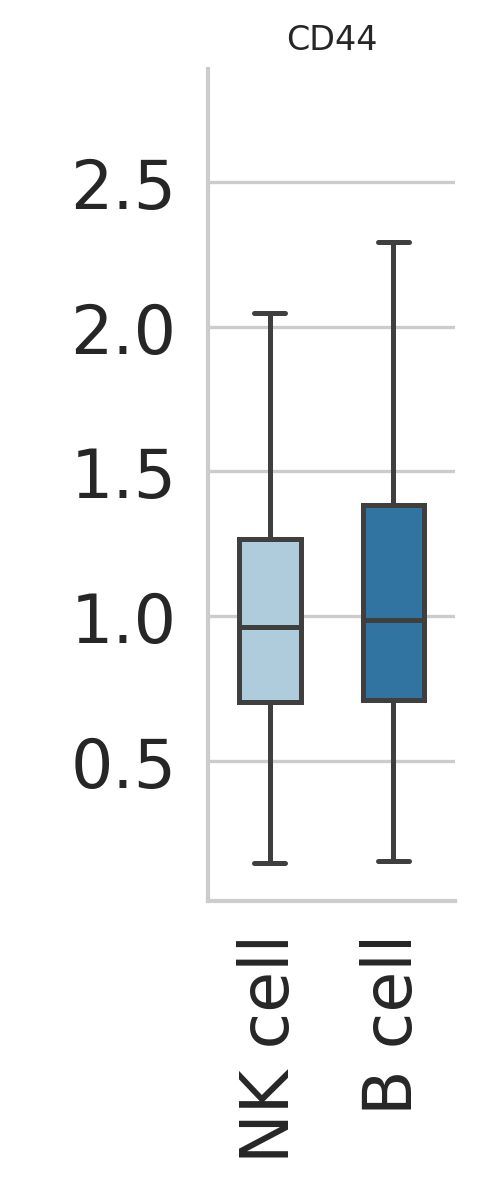

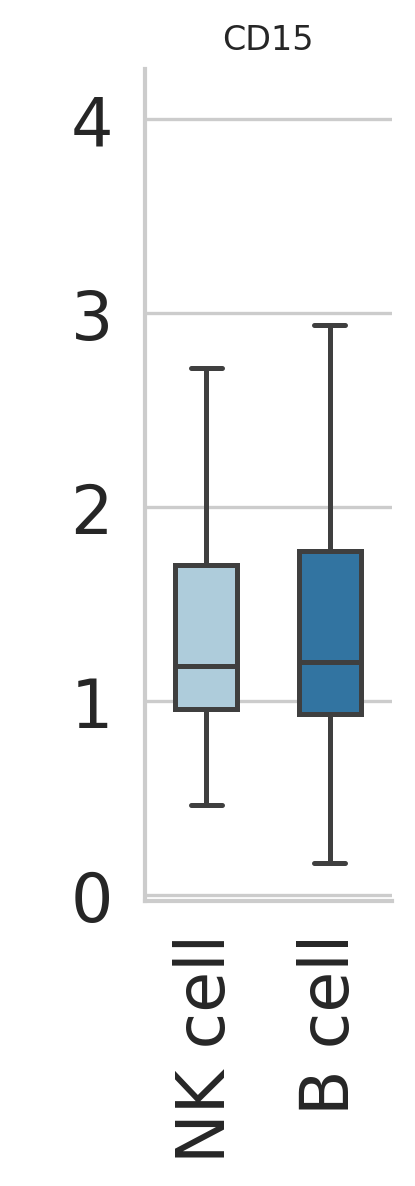

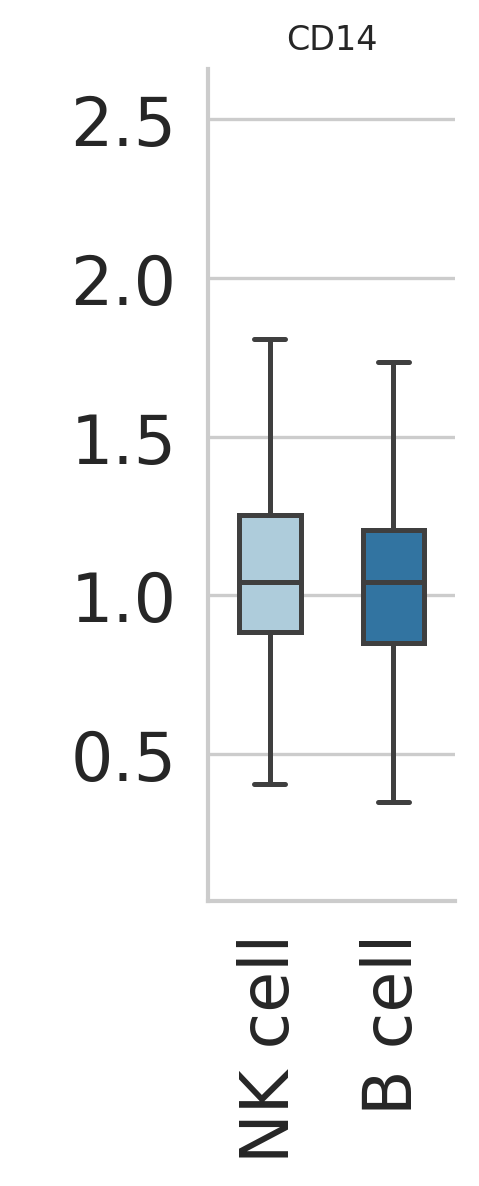

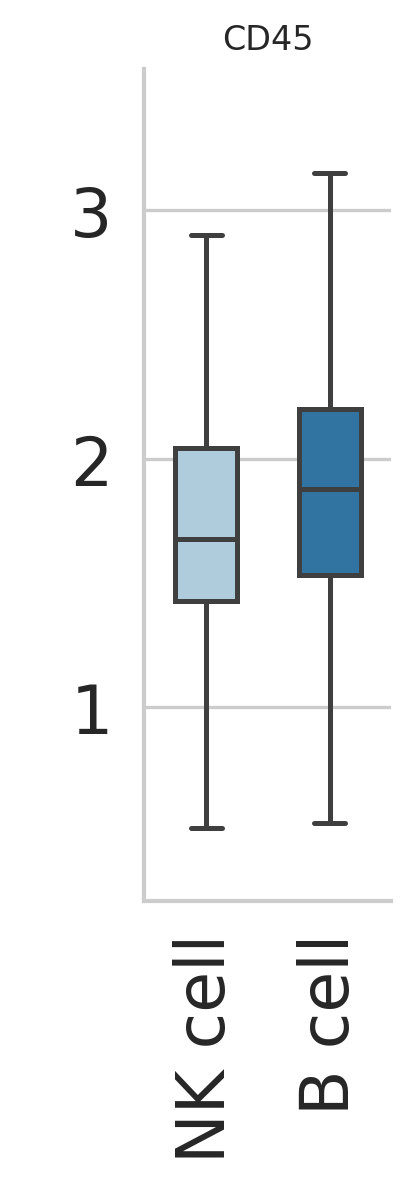

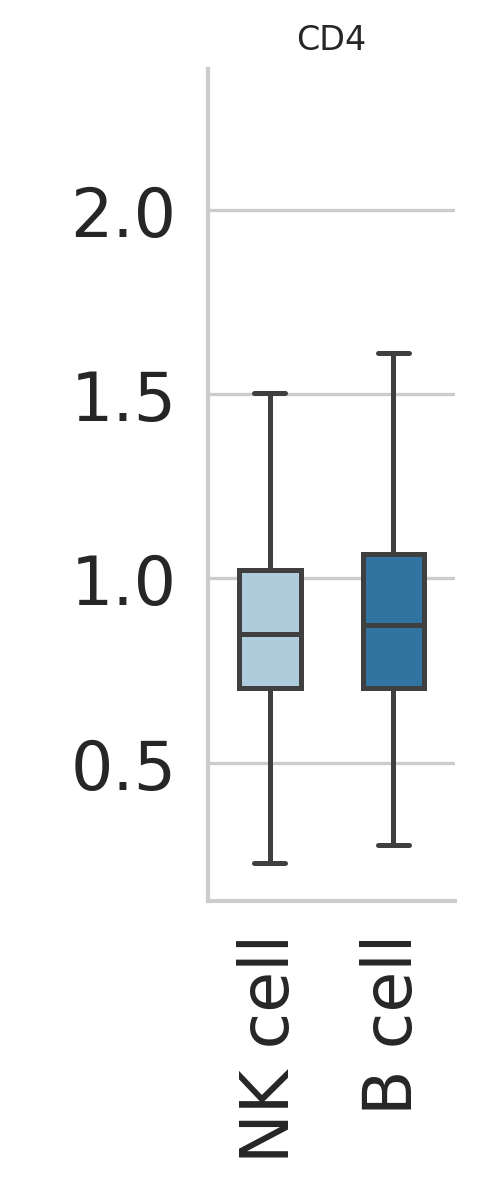

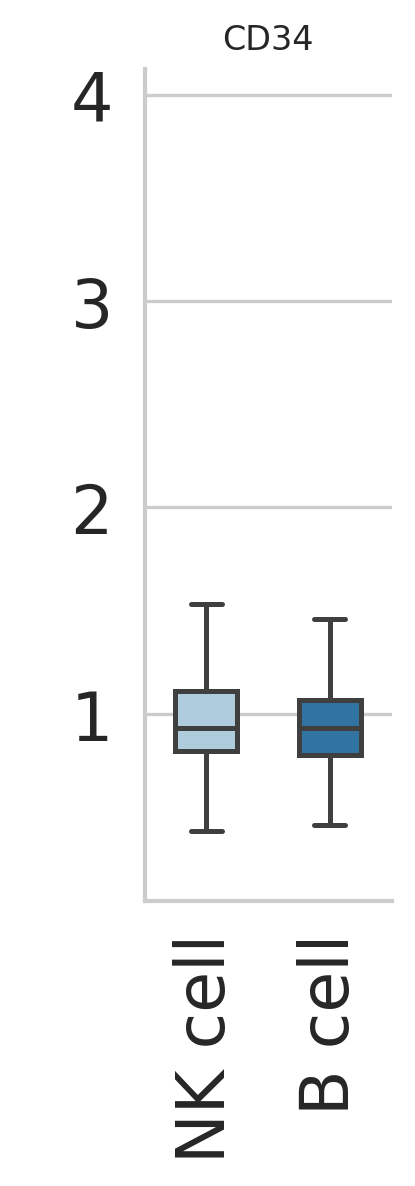

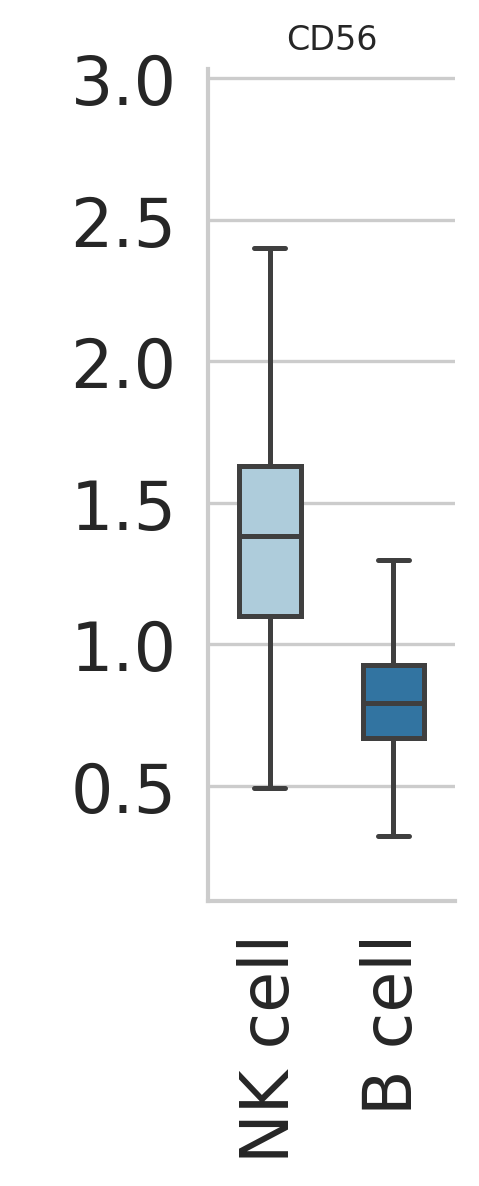

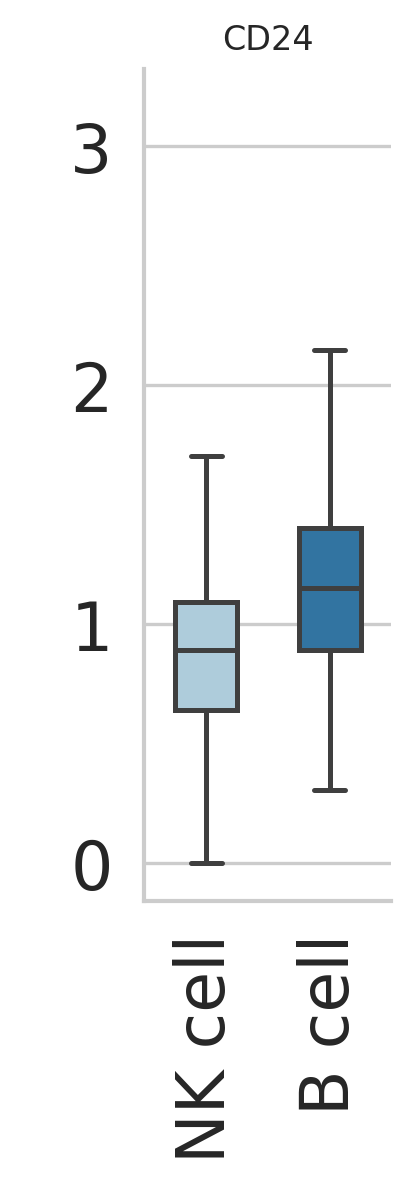

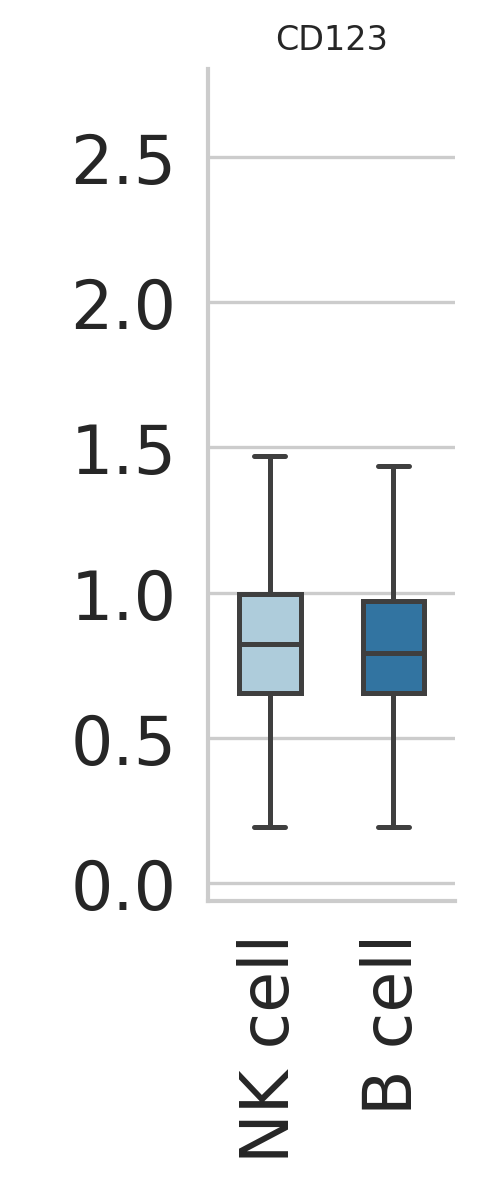

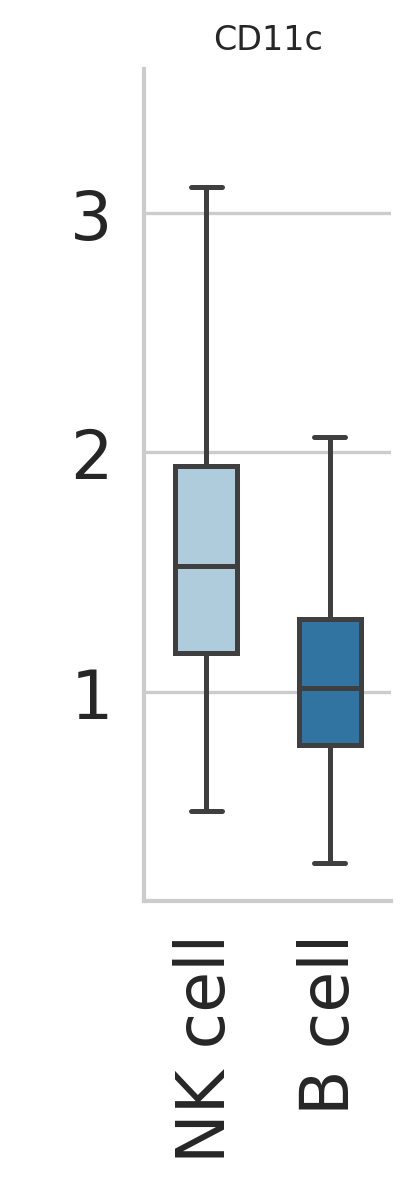

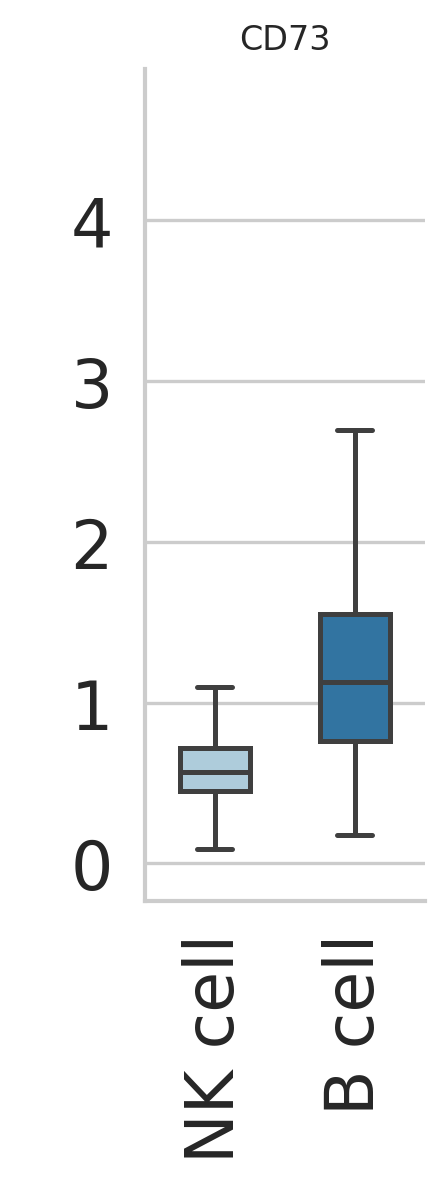

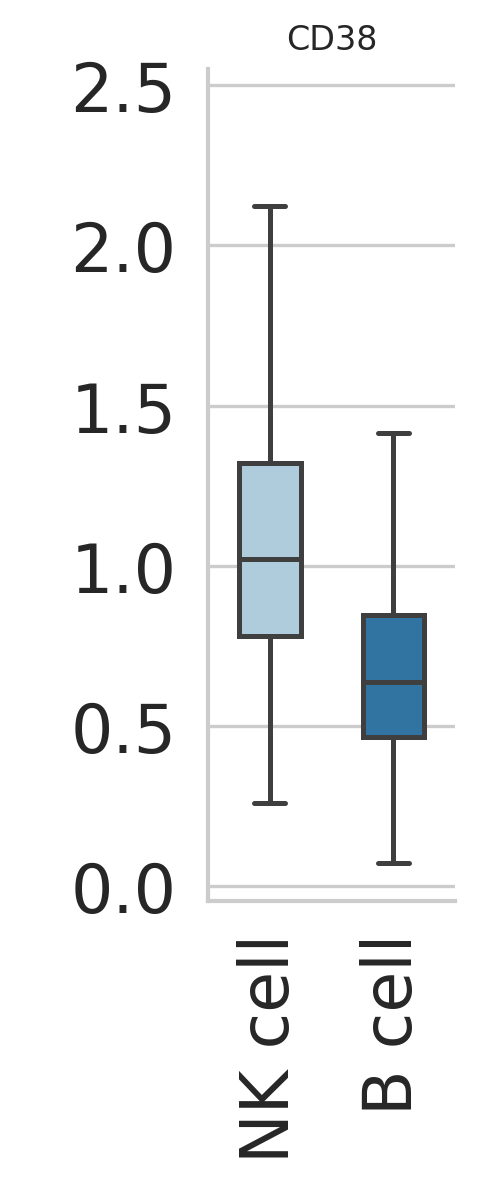

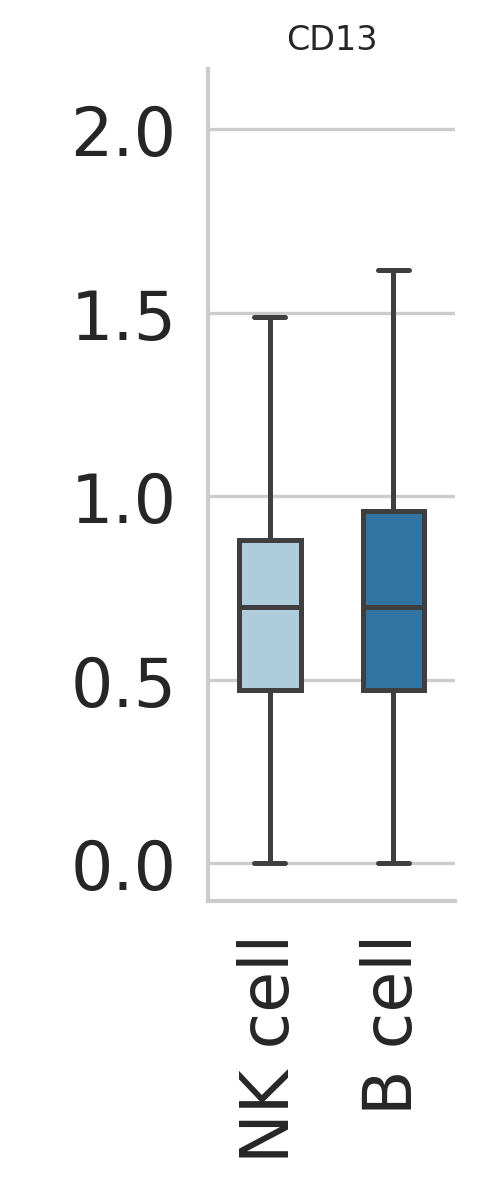

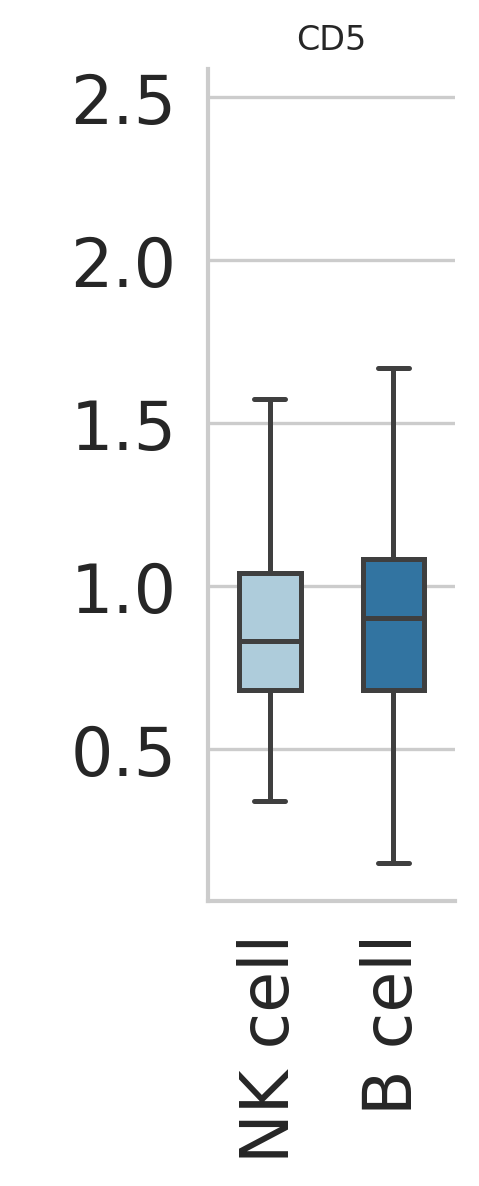

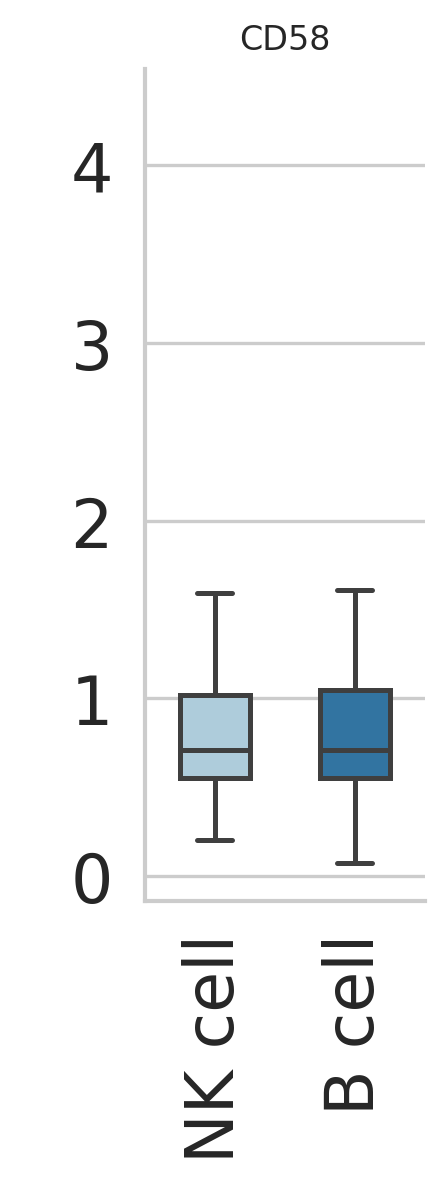

In [55]:
#CLR

for prot in df_clr[df_clr.columns[:-1]]:
    sns.set_theme(style = "whitegrid", font_scale= 0.7)
    ax=sns.catplot(x="cell_type", y=prot, hue="cell_type",
            aspect=.3,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=df_clr,
            width = 0.5)
    ax.fig.set_size_inches(2, 4)
    ax.set_xticklabels(rotation = 90)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set(xlabel=None)
    ax.set_ylabels(' ', fontsize= 10)
    #sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Cell type')
    plt.title(prot, fontsize=10)